# Machine Learning / Aprendizagem Automática

## Sara C. Madeira, 2019/20

# ML Project  - Learning about Pet Adoption using PetFinder.my Dataset

## Dataset

The dataset to be analysed is **`PetFinder_dataset.csv`**, made avaliable together with this project description. This dataset, downloaded from [Kaggle](https://www.kaggle.com), contains selected data from the following competition: [PetFinder.my Adoption Prediction](https://www.kaggle.com/c/petfinder-adoption-prediction/). 

PetFinder.my has been Malaysia’s leading animal welfare platform since 2008, with a database of more than 150,000 animals. PetFinder collaborates closely with animal lovers, media, corporations, and global organizations to improve animal welfare. Animal adoption rates are strongly correlated to the metadata associated with their online profiles, such as descriptive text and photo characteristics. As one example, PetFinder is currently experimenting with a simple AI tool called the Cuteness Meter, which ranks how cute a pet is based on qualities present in their photos. In this competition data scientist are supposed to develop algorithms to predict the adoptability of pets - specifically, how quickly is a pet adopted? If successful, they will be adapted into AI tools that will guide shelters and rescuers around the world on improving their pet profiles' appeal, reducing animal suffering and euthanization. 

**In this project, your team is supposed to use only tabular data (not Images or Image Metadata) and see how far you can go in predicting and understanging PetFinder.my adoptions. You should use both supervised and unsupervised learning to tackled 2 tasks:**

1. **Task 1 (Supervised Learning) - Predicting Adoption and Adoption Speed**
2. **Task 2 (Unsupervised Learning) - Charactering Adopted Pets and Adoption Speed**

The **`PetFinder_dataset.csv`** you should learn from has **14.993 instances** described by **24 data fields** that you might use as **categorical/numerical features** and matches the `train.csv` file made available for the competition (https://www.kaggle.com/c/petfinder-adoption-prediction/data). **The target in the original Kaggle challenge is `Adoption Speed`.**

### File Descriptions

* **PetFinder_dataset.csv** - Tabular/text data for the training set
* **breed_labels.csv** - Contains Type, and BreedName for each BreedID. Type 1 is dog, 2 is cat.
* **color_labels.csv** - Contains ColorName for each ColorID
* **state_labels.csv** - Contains StateName for each StateID

### Data Fields

* **PetID** - Unique hash ID of pet profile (Not Used)
* **Type** - Type of animal (1 = Dog, 2 = Cat)
* **AdoptionSpeed - Categorical speed of adoption. Lower is faster.** This is the value to predict in the competition. See below section for more info.
* **Name** - Name of pet (Empty if not named)
* **Age** - Age of pet when listed, in months
* **Breed1** - Primary breed of pet (see `BreedLabels.csv` for details)
* **Breed2** - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
* **Gender** - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
* **Color1** - Color 1 of pet (see `ColorLabel.csv` for details)
* **Color2** - Color 2 of pet (see `ColorLabel.csv` for details)
* **Color3** - Color 3 of pet (see `ColorLabel.csv` for details)
* **MaturitySize** - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)*
* **FurLength** - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)*
* **Vaccinated** - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
* **Dewormed** - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
* **Sterilized** - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
* **Health** - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified) 
* **Quantity** - Number of pets represented in profile*
* **Fee** - Adoption fee (0 = Free)*
* **State** - State location in Malaysia (Refer to StateLabels dictionary)
* **RescuerID** - Unique hash ID of rescuer (Not Used)
* **VideoAmt** - Total uploaded videos for this pet 
* **PhotoAmt** - Total uploaded photos for this pet
* **Description** - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

### AdoptionSpeed

The value of `AdoptionSpeed` describes how quickly, if at all, a pet is adopted:
* 0 - Pet was adopted on the same day as it was listed. 
* 1 - Pet was adopted between 1 and 7 days (1st week) after being listed. 
* 2 - Pet was adopted between 8 and 30 days (1st month) after being listed. 
* 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
* 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

### **Important Notes on Data Cleaning and Preprocessing**

   1. Data can contain **errors/typos**, whose correction might improve the analysis.
   2. Some features can contain **many values**, whose grouping in categories (aggregation into bins) might improve the analysis.
   3. Data can contain **missing values**, that you might decide to fill. You might also decide to eliminate instances/features with high percentages of missing values.
   4. **Not all features are necessarily important** for the analysis.
   5. Depending on the analysis, **some features might have to be excluded**.
   6. Class distribution is an important characteristic of the dataset that should be checked. **Class imbalance** might impair machine learning.  
  
Some potentially useful links:

* Data Cleaning and Preprocessing in Scikit-learn: https://scikit-learn.org/stable/modules/preprocessing.html#
* Data Cleaning and Preprocessing in Orange: https://docs.biolab.si//3/visual-programming/widgets/data/preprocess.html
* Dealing with imbalance datasets: https://pypi.org/project/imbalanced-learn/ and https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets#t7

## Task 0 (Know your Data) - Exploratory Data Analysis

## 0.1. Loading Data

In [9]:
#Get directory to files
import os
path = os.getcwd()
path = os.path.join(path,"datasets")
path

'C:\\Users\\peped\\Documents\\Repo\\MLproject\\datasets'

In [10]:
# Load data
import pandas as pd

df = pd.read_csv(os.path.join(path,"PetFinder_dataset.csv"))

In [11]:
##Import external Modules
import sys
import numpy as np
import math
import pandas_profiling
from matplotlib import pyplot as plt
import seaborn as sns
from nltk import NaiveBayesClassifier as NBC
import nltk
import nltk.corpus
from nltk.stem import WordNetLemmatizer as lemmatizer
from nltk.corpus import stopwords
import plotly.graph_objects as go
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from scipy.cluster import hierarchy
from scipy.stats import spearmanr
from collections import defaultdict
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from mlxtend.preprocessing import TransactionEncoder
from imblearn.combine import SMOTETomek

#un comment to download for the first time
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')

## Import developed modules
from AA_module import *

In [12]:
#dataset summary
df.describe()

Type           Age        Breed1        Breed2        Gender  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.457614     10.452078    265.272594     74.009738      1.776162   
std        0.498217     18.155790     60.056818    123.011575      0.681592   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      2.000000    265.000000      0.000000      1.000000   
50%        1.000000      3.000000    266.000000      0.000000      2.000000   
75%        2.000000     12.000000    307.000000    179.000000      2.000000   
max        2.000000    255.000000    307.000000    307.000000      3.000000   

             Color1        Color2        Color3  MaturitySize     FurLength  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       2.234176      3.222837      1.882012      1.862002      1.467485   
std        1.745225      2.742562      2.984086      0.547959      0.599070   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      2.000000      1.000000   
50%        2.000000      2.000000      0.000000      2.000000      1.000000   
75%        3.000000      6.000000      5.000000      2.000000      2.000000   
max        7.000000      7.000000      7.000000      4.000000      3.000000   

         Vaccinated      Dewormed    Sterilized        Health      Quantity  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.731208      1.558727      1.914227      1.036617      1.576069   
std        0.667649      0.695817      0.566172      0.199535      1.472477   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        1.000000      1.000000      2.000000      1.000000      1.000000   
50%        2.000000      1.000000      2.000000      1.000000      1.000000   
75%        2.000000      2.000000      2.000000      1.000000      1.000000   
max        3.000000      3.000000      3.000000      3.000000     20.000000   

                Fee         State      VideoAmt      PhotoAmt  AdoptionSpeed  
count  14993.000000  14993.000000  14993.000000  14993.000000   14993.000000  
mean      21.259988  41346.028347      0.056760      3.889215       2.516441  
std       78.414548     32.444153      0.346185      3.487810       1.177265  
min        0.000000  41324.000000      0.000000      0.000000       0.000000  
25%        0.000000  41326.000000      0.000000      2.000000       2.000000  
50%        0.000000  41326.000000      0.000000      3.000000       2.000000  
75%        0.000000  41401.000000      0.000000      5.000000       4.000000  
max     3000.000000  41415.000000      8.000000     30.000000       4.000000

In [13]:
#dataset profilling
pandas_profiling.ProfileReport(df)

Only missing values are in Name and Description.

Could be insert a global constant for each value, since the noun existence of this feature might be of importance for adoption speed.

Only expected correlations (ex:color1-color2)

## 0.2. Understanding Data

In this task you should **understand better the features**, their distribution of values, potential errors, etc and plan/describe what data preprocessing steps should be performed next. Very important also is the distribution of values in the target (class distribution). 

Here you can find a notebook with some examples of what you can do in **Exploratory Data Analysis**: https://www.kaggle.com/artgor/exploration-of-data-step-by-step/notebook. You can also use Orange widgets for this.

### 0.2.1. Target

#### 0.2.1.1 Target - Adoption Speed

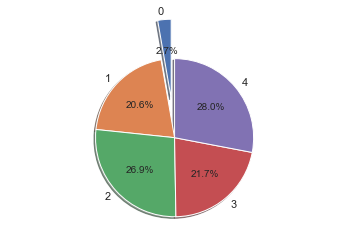

In [14]:
make_pie(df['AdoptionSpeed'])

The target is clearly imbalanced, since the class 0 is only present on 2.7% of the examples on the dataset. 

This imbalance can be corrected with over sampling and under sampling techniques. 

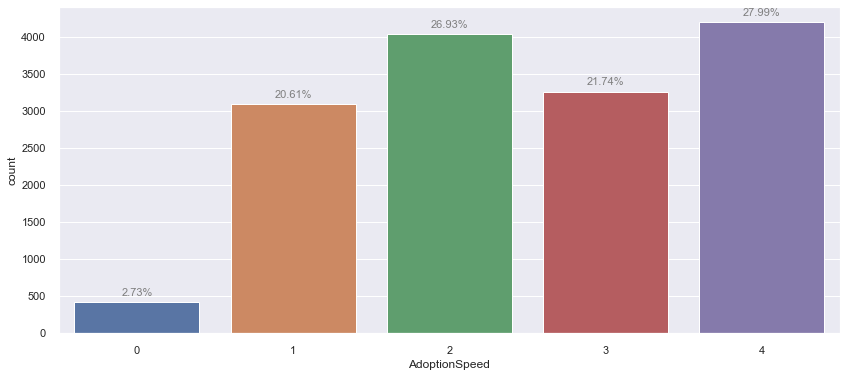

In [15]:
make_bar_chart(df['AdoptionSpeed'])

#### 0.2.1.2 Target - Adoption
* Not adopted = 0
* Adopted = 1

In [12]:
df['Adoption'] = 0 
df['Adoption'][df.AdoptionSpeed != 4] = 1

C:\Users\peped\Miniconda3\envs\AA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



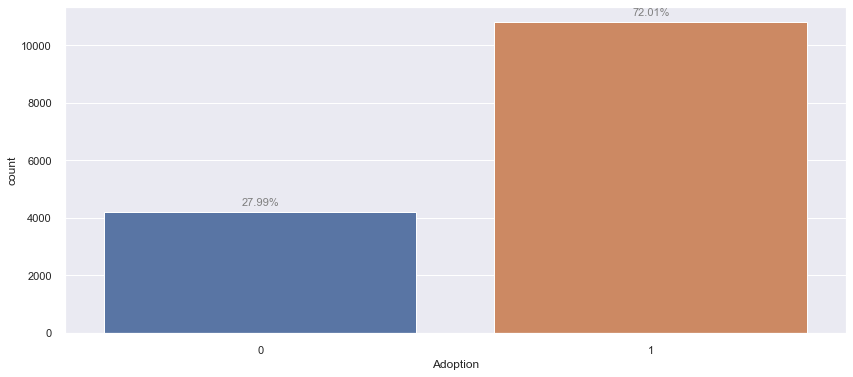

In [17]:
make_bar_chart(df['Adoption'])

In our binary target we also observe a slight imbalance, that will probably be corrected using the same techniques.

### 0.2.2. Type

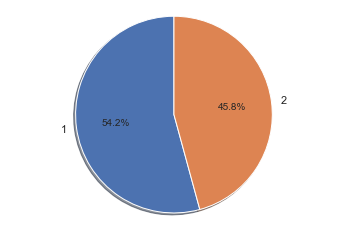

In [18]:
make_pie(df['Type'])

The dataset is equality distributed in cats/dogs examples.

<Figure size 1296x576 with 0 Axes>

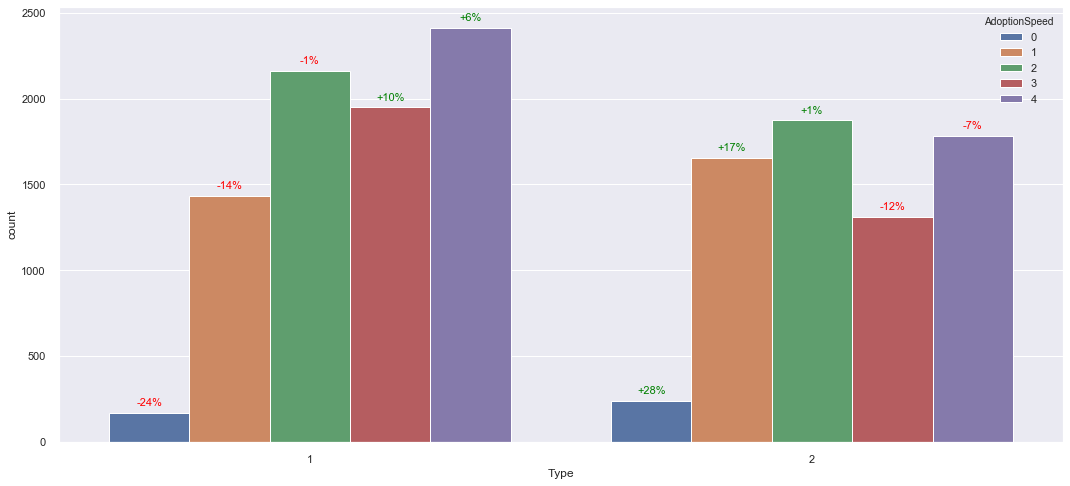

In [19]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='Type', title='by pet Type')

Cat's are likely to be adopted sooner them Dogs.

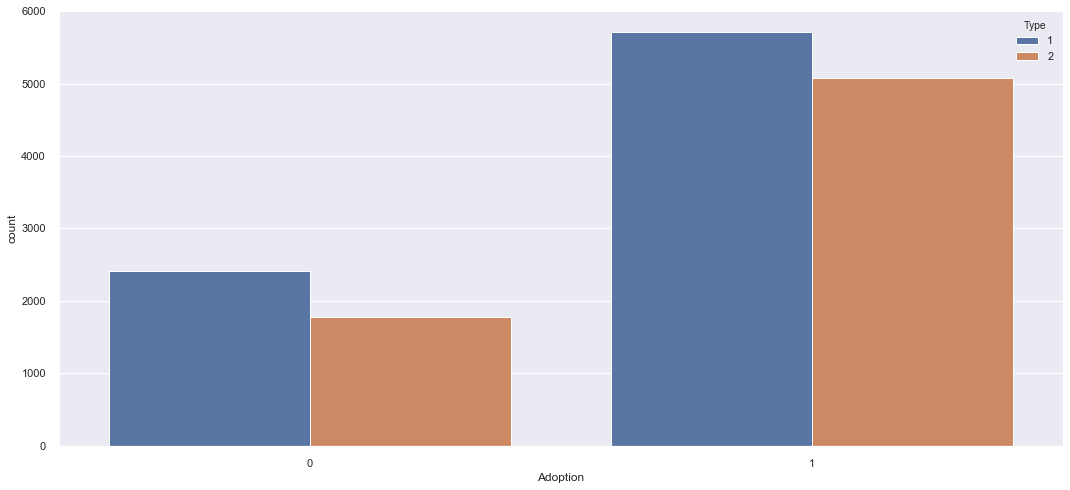

In [20]:
plt.figure(figsize=(18, 8));
sns.countplot(x='Adoption', data=df, hue='Type');

The binary target Adoption is well balanced when considering the types of pets individually

### 0.2.3. Gender

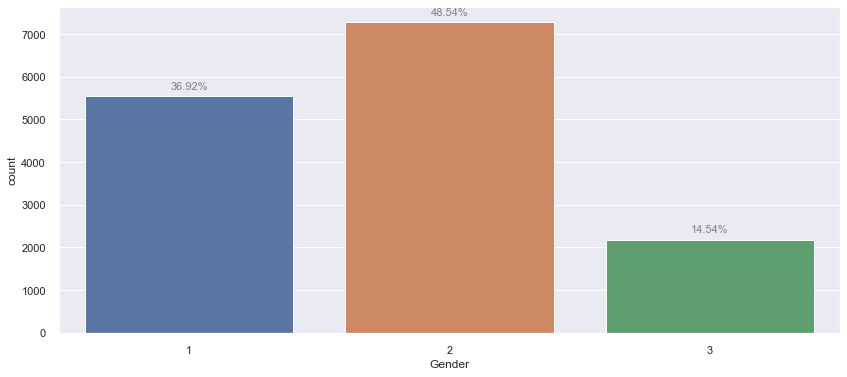

In [21]:
make_bar_chart(df['Gender'])

There are slightly more female pets them any other genre type.

<Figure size 1296x576 with 0 Axes>

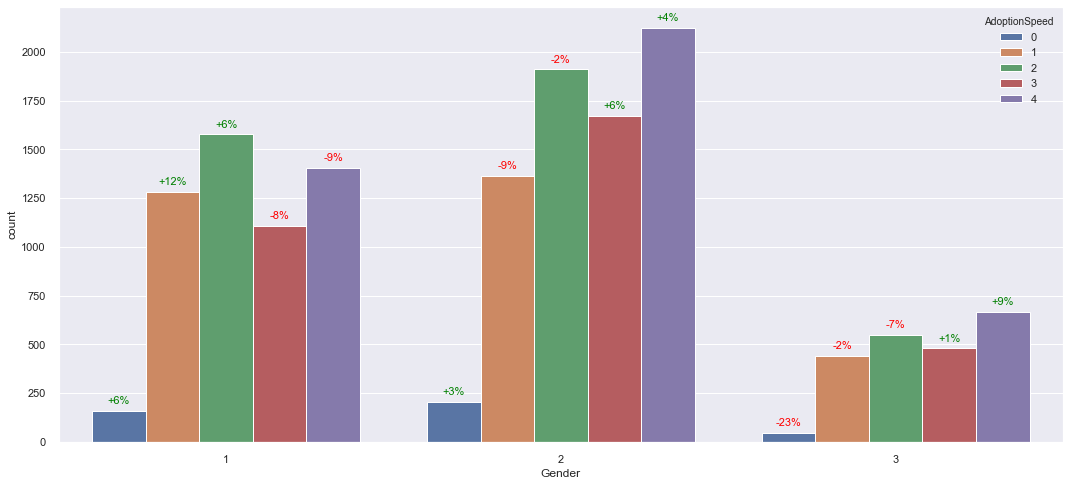

In [22]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='Gender', title='by pet Gender')

Male pets are adopted sooner than female, or mixed, gender 

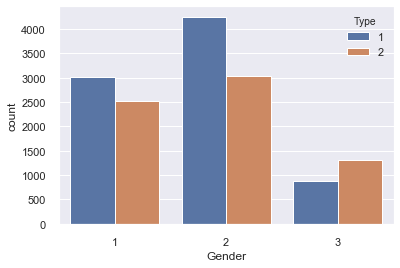

In [23]:
sns.countplot(x='Gender', data=df, hue='Type');

Genders are well distributed if types are considered separately.

### 0.2.4. Age

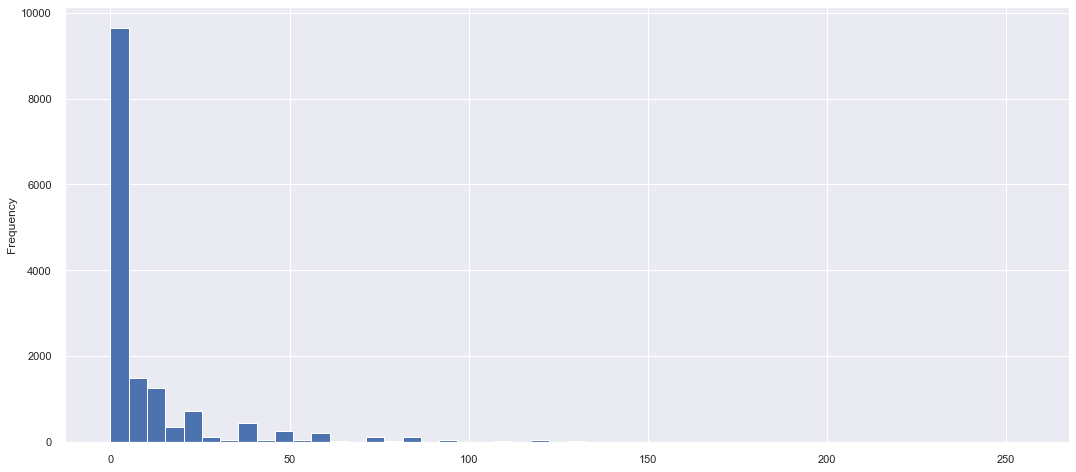

In [24]:
plt.figure(figsize=(18, 8));
df['Age'].plot(kind='hist', label='train', bins=50)

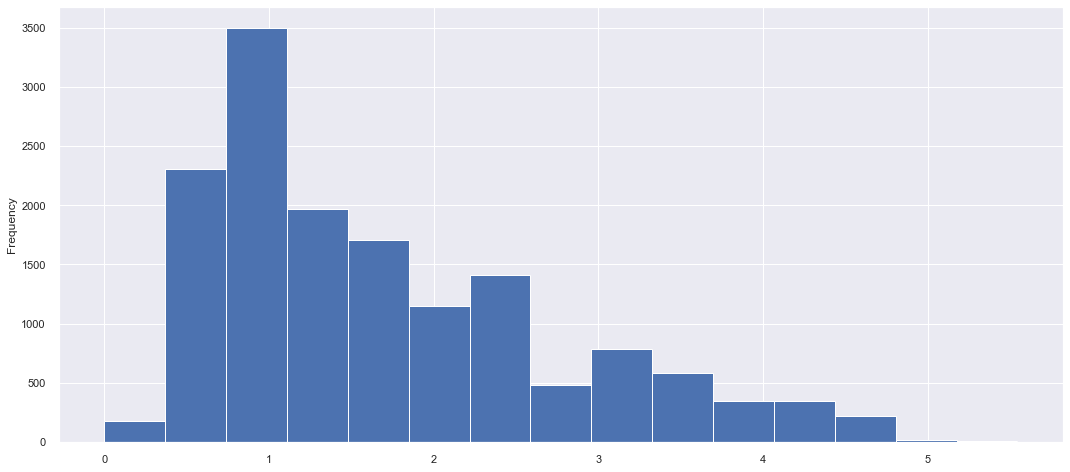

In [25]:
#Log
plt.figure(figsize=(18, 8));
np.log1p(df['Age']).plot('hist', label='train', bins=15)

There is a wide range of values in the histogram, with most pets being very young.

By categorizing the pets by age, the data regarding this feature can be analyzed more easily.

In [26]:
#Create age categories
#Enconding
#0-1 = 0, 1-2 = 1, 2-4 = 2, 4-12 = 3, 12-inf = 4
#guarantee similar percentages in all categaries to balance age
df['agecat'] = pd.cut(df['Age'], [0, 1, 2, 4, 12,math.inf], include_lowest=True, labels=['0', '1', '2','3','4'])

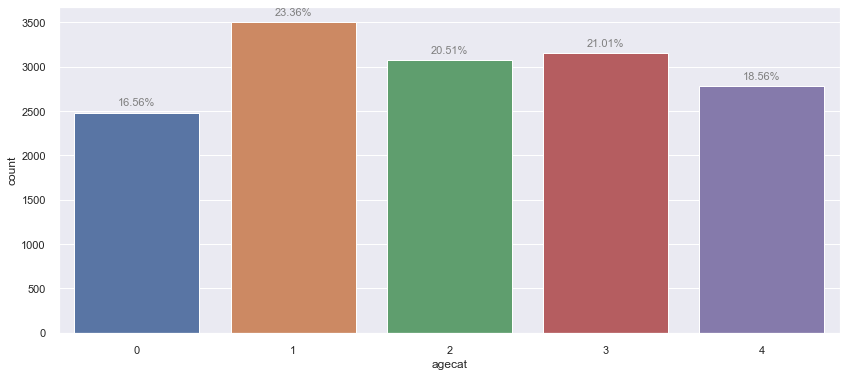

In [27]:
make_bar_chart(df['agecat'])

The categories created are well balanced.

<Figure size 1296x576 with 0 Axes>

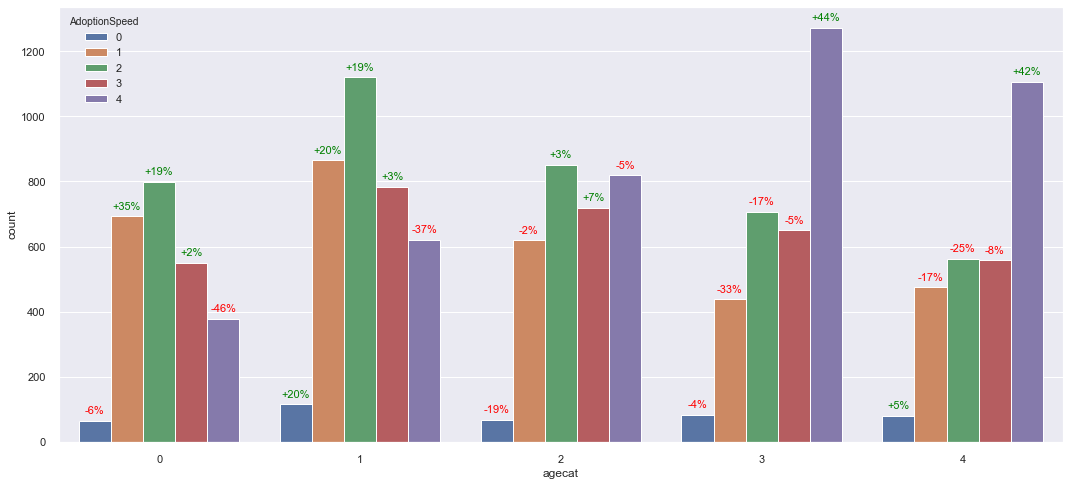

In [28]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='agecat', title='by pet Age')

The adoption speed of a pet is inversely proportional to his/her age.

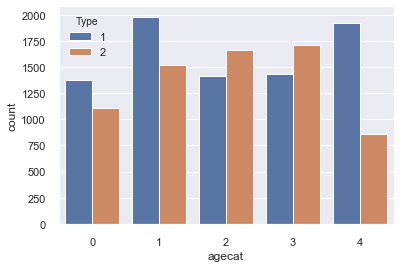

In [29]:
sns.countplot(x='agecat', data=df, hue='Type');

There is some imbalance in categories when considering types separately. When creating type specific predictors the use of this feature might be impaired.

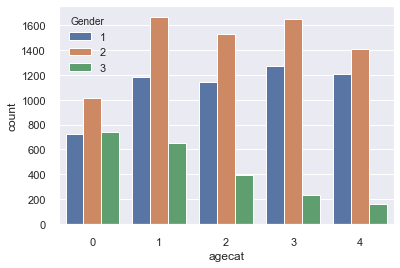

In [30]:
sns.countplot(x='agecat', data=df, hue='Gender');

Mixed genders are normally only found in young pets. This might happen due to people not being able to keep the litters.

### 0.2.5. Breed

In [31]:
#Load breed labels
breed_label = pd.read_csv(os.path.join(path,'breed_labels.csv'))
#Guarantee Uppercase
for i, breed in enumerate(breed_label['BreedName']):
    breed_label.loc[i, 'BreedName'] = breed.upper()

In [32]:
#Load Fci official dog breeds
fci_dog =  pd.read_csv(os.path.join(path,'dog_fci.csv'))
#Check non-breeds in dogs
breed_label_dogs = breed_label[breed_label.Type == 1]
not_breeds_dog = breeds_check(np.array(breed_label_dogs['BreedName']), np.array(fci_dog['name']))
not_breeds_dog

['AKBASH',
 'BEAUCERON',
 'BOERBOEL',
 'CAROLINA DOG',
 'CATAHOULA LEOPARD DOG',
 'CHINOOK',
 'COCKAPOO',
 'ENTLEBUCHER',
 'FEIST',
 'KEESHOND',
 'LOWCHEN',
 'MCNAB',
 'PAPILLON',
 'POMERANIAN',
 'SARPLANINAC',
 'XOLOITZCUINTLE/MEXICAN HAIRLESS',
 'MIXED BREED']

We now have to deal with typos and breeds that might not be official, and aliases.
After a quick Google search, it checks out that all dog breeds exist, with the exception of 'MIXED BREED' an alias for a mutt

In [33]:
#Load CFA official cat breeds
cfa_cat =  pd.read_csv(os.path.join(path,'cat_cfa.csv'))
cfa_cat = np.array(cfa_cat['name'])
for i, breed in enumerate(cfa_cat):
    cfa_cat[i] = breed.upper()
#Check non-breeds in cats
breed_label_cats = breed_label[breed_label.Type == 2]
not_breeds_cat = breeds_check(np.array(breed_label_cats['BreedName']), cfa_cat)
not_breeds_cat

['CALICO',
 'CANADIAN HAIRLESS',
 'CHAUSIE',
 'CHINCHILLA',
 'CYMRIC',
 'DILUTE CALICO',
 'DILUTE TORTOISESHELL',
 'DOMESTIC LONG HAIR',
 'DOMESTIC MEDIUM HAIR',
 'EXTRA-TOES CAT (HEMINGWAY POLYDACTYL)',
 'HIMALAYAN',
 'JAVANESE',
 'MUNCHKIN',
 'NEBELUNG',
 'PIXIE-BOB',
 'SILVER',
 'SNOWSHOE',
 'TABBY',
 'TIGER',
 'TORBIE',
 'TORTOISESHELL',
 'TUXEDO']

In cat breeds their are several non-breeds:

- Descriptions: 
 * 'DOMESTIC LONG HAIR'
 * 'DOMESTIC MEDIUM HAIR'
 * 'EXTRA-TOES CAT (HEMINGWAY POLYDACTYL)'
 
 
- Fur colors or patterns: 

 * 'SILVER'
 * 'TABBY'
 * 'TIGER'
 * 'TORBIE'
 * 'TORTOISESHELL'

In [34]:
non_breeds = [
 'DOMESTIC LONG HAIR',
 'DOMESTIC MEDIUM HAIR',
 'EXTRA-TOES CAT (HEMINGWAY POLYDACTYL)',
 'SILVER',
 'TABBY',
 'TIGER',
 'TORBIE',
 'TORTOISESHELL',
 'MIXED BREED']

Now let's create a new Breed Feature (breedcat):
- Encoding:
 * 0 - No Breed
 * 1 - Contains Breed

In [35]:
#Set class as 1
df['breedcat'] = [1 for i in range(len(df))]
#get No_Bree's Id
non_breedf = breed_label[breed_label.BreedName.isin(non_breeds)]
non_breed = np.array(non_breedf['BreedID'])
#Change if No_Breed
for i in range(len(df)):
    if df.loc[i, 'Breed1'] in non_breed or df.loc[i, 'Breed2'] in non_breed:
        df.loc[i, 'breedcat'] = 0

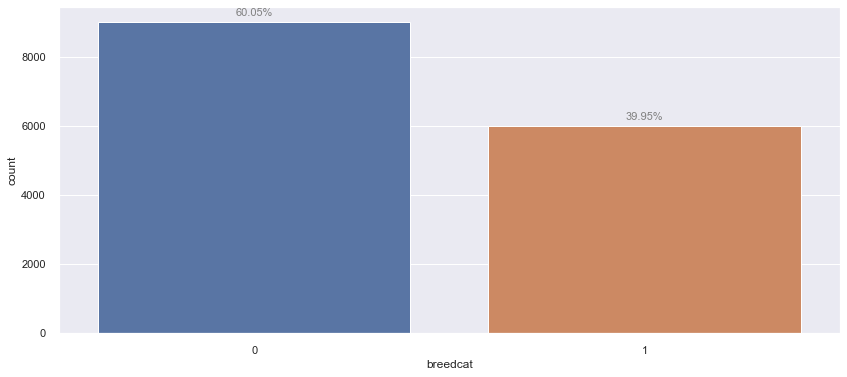

In [36]:
make_bar_chart(df['breedcat'])

<Figure size 1296x576 with 0 Axes>

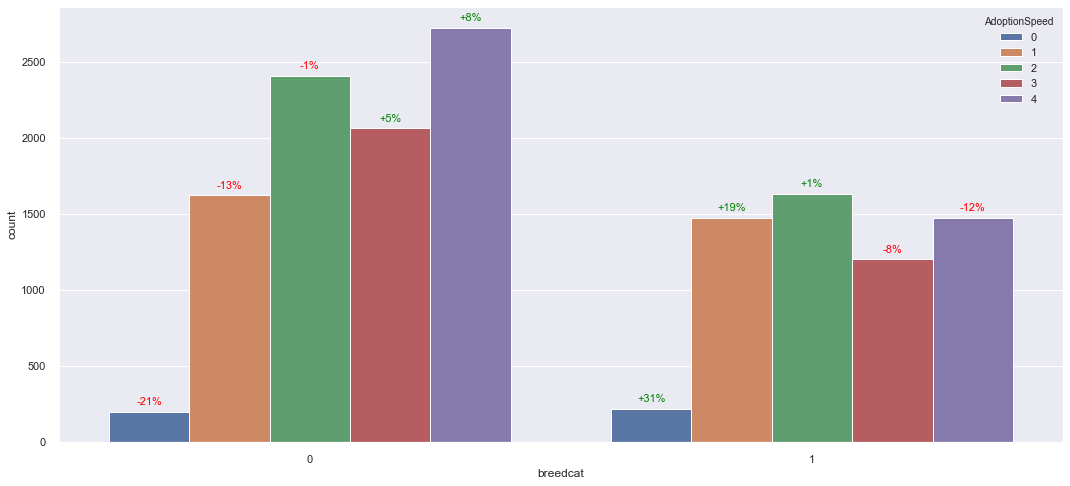

In [37]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='breedcat', title='by pet breed')

Pets with a breed are adopted faster

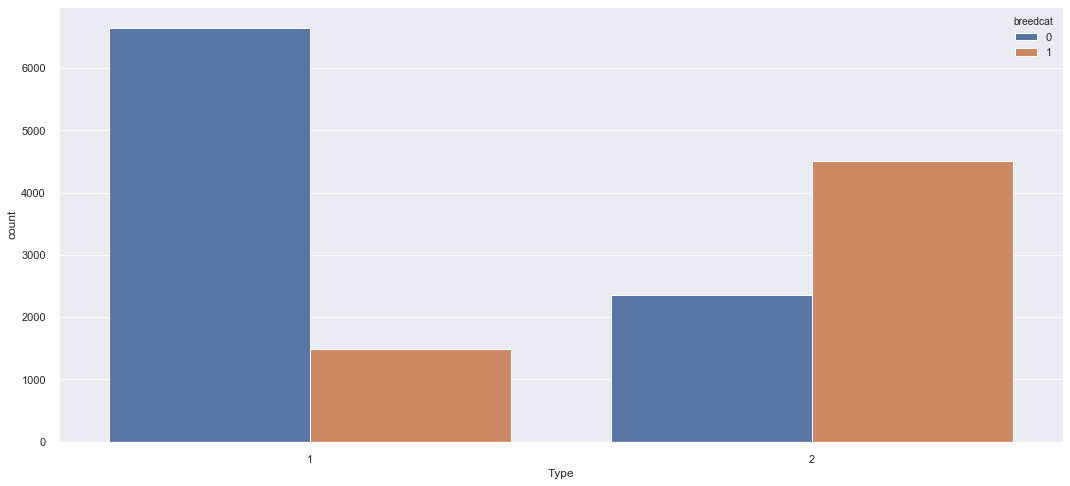

In [38]:
plt.figure(figsize=(18, 8));
sns.countplot(x='Type', data=df, hue='breedcat')

When considering types separately, this feature similarly to others is heavily imbalanced. 

### 0.2.6. Name

In [39]:
df['Name'].value_counts().head()

Baby       66
Lucky      64
Brownie    54
No Name    54
Mimi       52
Name: Name, dtype: int64

#### 0.2.6.1 Fake names

There are many 'names' that aren't really names let's try to tell them apart.

In [40]:
#list of proibided strings
prb = ['KITT', 'PUPPY', 'DOG', 'MALE', 'FEMALE','FOR', 'NO NAME', 'NAN', 'BOY', 'GIRL']
names = []
for i, name in enumerate(df['Name']):
        if is_number(name) is True or name.isdigit() is True:
            names.append(i)
        else:
            name = name.upper()
            if len(name) <3 or any(string in name for string in prb)  or any(char.isdigit() for char in name):
                names.append(i)

In [41]:
#Set class as 2
df['namecat'] = [1 for i in range(len(df))]
df.loc[names,'namecat'] = 0

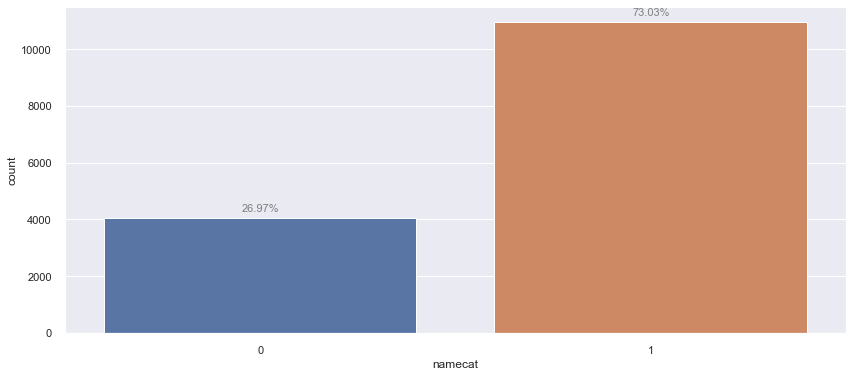

In [42]:
make_bar_chart(df['namecat'])

<Figure size 1296x576 with 0 Axes>

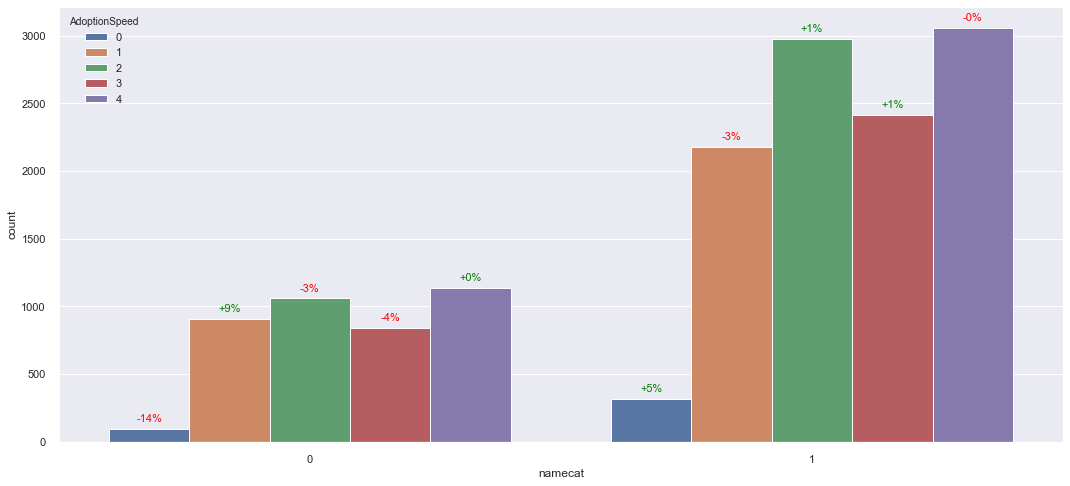

In [43]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='namecat', title='by pet name')

It doesn't seem to exist a big difference, in terms of adoption speed, between pets with real/fake names. 

#### 0.2.6.2 No Names

Let's observe the difference between having a name vs having no name.

In [44]:
prb = ['NO NAME']
names = []
for i, name in enumerate(df['Name']):
        if is_number(name) is True or name.isdigit() is True:
            continue
        name = name.upper()
        if any(string in name for string in prb):
            names.append(i)

In [45]:
df['namecat'] = [1 for i in range(len(df))]
df.loc[names,'namecat'] = 0

<Figure size 1296x576 with 0 Axes>

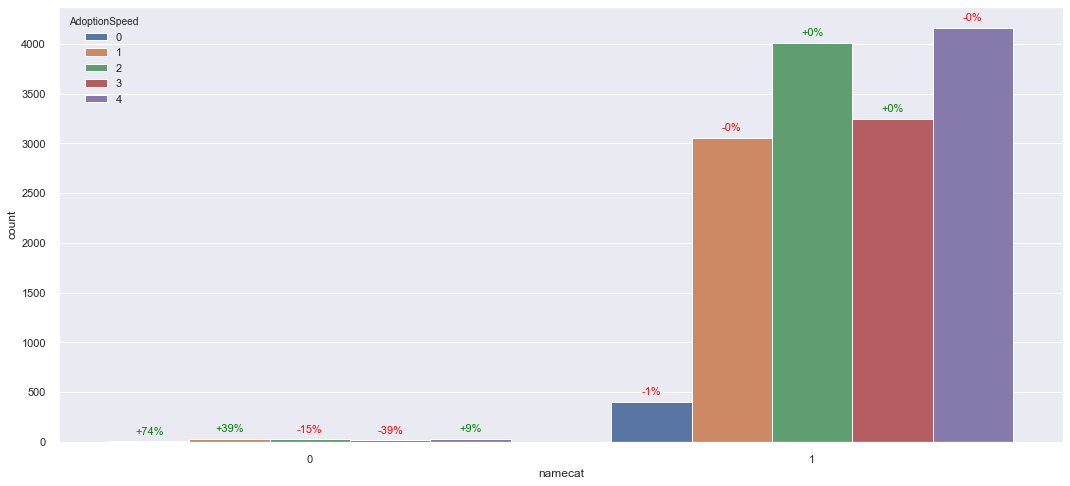

In [46]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='namecat', title='by pet name')

It seems that not having a name guaranties a bigger probability of being adopted faster. Although there are very few cases of a pet having no name. 

This is probably due to the absence of name meaning a younger age.

#### 0.2.6.3 Common Names

Next we will compare fake names vs common names vs the rest. 

With the following encoding:

* 0 - Fake Names
* 1 - Common Names
* 2 - Rest

In [47]:
df['namecat'] = [2 for i in range(len(df))]
prb = ['KITT', 'PUPPY', 'DOG', 'MALE', 'FEMALE','FOR', 'NO NAME', 'NAN', 'BOY', 'GIRL']
names = []
for i, name in enumerate(df['Name']):
        if is_number(name) is True or name.isdigit() is True:
            names.append(i)
        else:
            name = name.upper()
            if len(name) <3 or any(string in name for string in prb)  or any(char.isdigit() for char in name):
                names.append(i)
df.loc[names,'namecat'] = 0

In [48]:
temp = df['Name'].value_counts()[:100]
names2 = []
for i, name in enumerate(df['Name']):
    if name in temp:
        names2.append(i)
df.loc[names2, 'namecat'] = 1


<Figure size 1296x576 with 0 Axes>

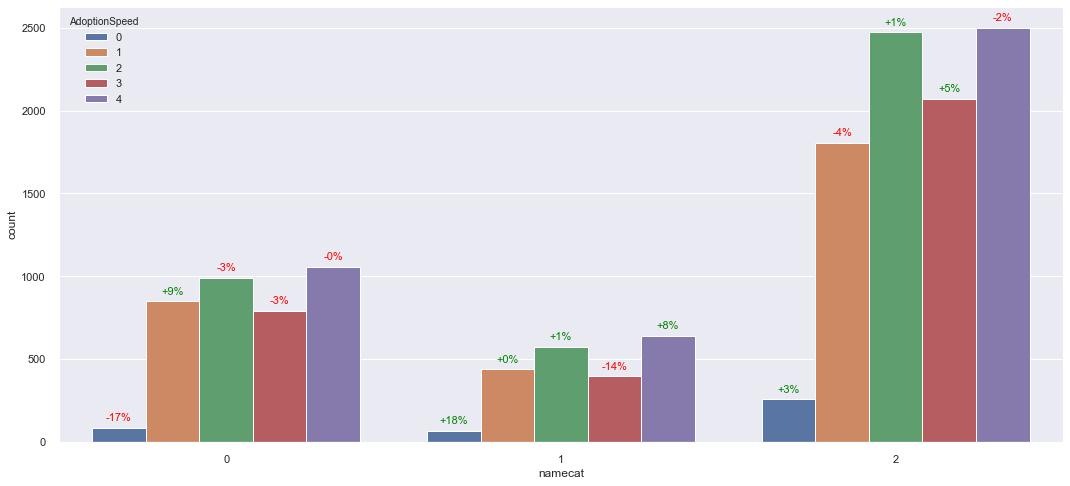

In [49]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='namecat', title='by pet name')

Making this comparison we reach no clear conclusion.

#### 0.2.6.4 Bins of names by alphabetical order

This categorization strategy, is based on the alphabetical order of the first letter of each name. 

We create bins according to a range of letters, with the following encoding.

**Starts with:**

* No letter - 0
* A until H - 1
* H until R - 2
* S until Z - 3


In [50]:
df['namecat'] = 0
df.loc[ab_range('a','h', df, 'Name'), 'namecat'] = 1
df.loc[ab_range('i','r', df, 'Name'), 'namecat'] = 2
df.loc[ab_range('s','z', df, 'Name'), 'namecat'] = 3

<Figure size 1296x576 with 0 Axes>

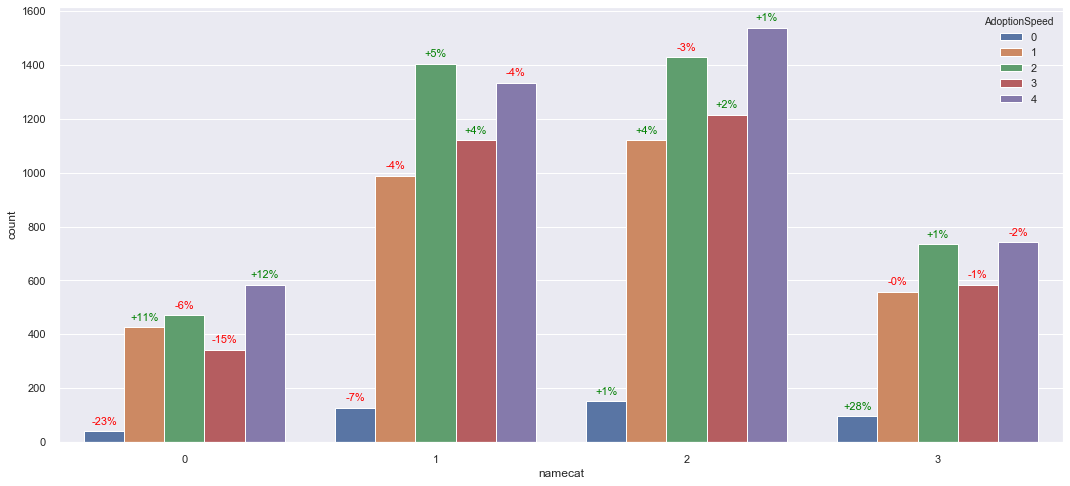

In [51]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='namecat', title='by pet name')

Again no clear conclusions could be taken.

#### 0.2.6.5 NLP Approach

In this approach we used basic Natural Language Processing to predict, only based on the name, if a pet will be adopted. 

The resulting predictions will them create a binary feature that can be feed into future classifiers instead of the name feature.

To train our NLP classifier we use the letter counts for each name has features.

In [52]:
#Generate Features dataset
labeled_names = []

for i in range(len(df)):
    labeled_names.append((df.loc[i ,'Name'], df.loc[i,'Adoption']))

featuresets = [(name_features(str(n)), name) for (n, name) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]

In [53]:
#Train classifier
classifier = NBC.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.7


In [54]:
#Make predictions
pred = []
for feat in df['Name']:
    pred.append(classifier.classify(name_features(str(feat))))
    
#check if both classes are being predicted
pred_check(pred, 2)

True

In [55]:
#Show main features
classifier.show_most_informative_features(5)

Most Informative Features
                count(j) = 4                   0 : 1      =      4.3 : 1.0
                count(w) = 4                   0 : 1      =      3.6 : 1.0
                count(r) = 5                   1 : 0      =      3.5 : 1.0
                count(i) = 5                   0 : 1      =      3.3 : 1.0
                count(s) = 6                   0 : 1      =      2.6 : 1.0


To avoid over-fitting we generalize the classifier by creating a scoring function that takes into account only the 5 most important features. This scoring function will them be used to create the binary categories.

In [56]:
#scoring 
names = []
for i, name in enumerate(df['Name']):
    score = 0
    temp = name_features(str(name))
    score -= 1.075 * temp['count(j)']
    score += 1.33 * temp['count(k)']
    score -= 0.66 * temp['count(i)']
    score += 0.54 * temp['count(r)']
    score -= 0.20 * temp['count(v)']
    if score > 0:
        names.append(i)
df['namecat'] = 0
df.loc[names, 'namecat'] = 1
    

<Figure size 1296x576 with 0 Axes>

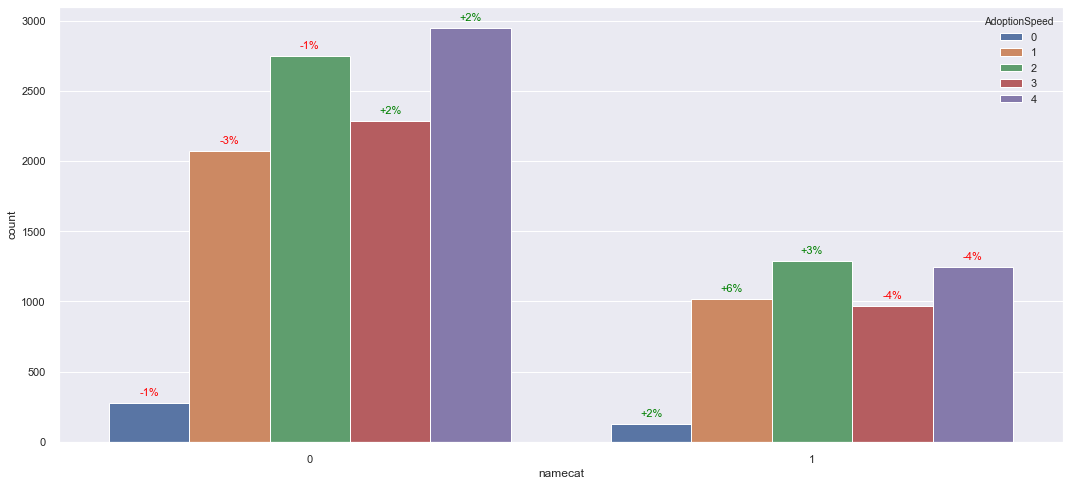

In [57]:
#Plot
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='namecat', title='by pet name')

It can be observed that our final feature can be helpful in discriminating adoption.

### 0.2.7. Description

The description is a feature that contains unstructured text, therefore can not be feed directly to a classifier. To be able to use this feature preprocessing is necessary, our approach, similarly to what was done with the names feature, was to apply NLP techniques.

Once again our objective was to pre-classify the descriptions and use the most important features to encode the description feature into a binary feature (adopted or not adopted).

In this case we have multiple words, so we had to use a different set of features, since letter count would not represent our text accurately. We start by separating the text into words, and them removing all the stop words. In the final set of words all the inflections are removed, leaving only the words in their basic form, this set is them tagged.

Finally the features feed to the NLP classifier are tag counts.

In [58]:
#NLTK Aproach
#import lists
tagset = pd.read_csv(os.path.join(path,"tags.csv"))
stop = set(stopwords.words('english'))
#get all tokens
all_tokens = nltk.FreqDist(lemmatizer.lemmatize(lemmatizer,w.lower()) for desc in df['Description'] \
                           for w in nltk.word_tokenize(str(desc)) if w not in stop)

In [59]:
#Top x tokens
all_tokens.most_common(20)

[('.', 64407),
 (',', 30124),
 ('i', 10275),
 ('home', 7971),
 (')', 7775),
 ('dog', 6295),
 (':', 6253),
 ('cat', 6068),
 ('she', 5792),
 ('please', 5702),
 ('(', 5409),
 ('!', 5012),
 ('kitten', 4543),
 ('love', 4420),
 ('he', 4412),
 ('puppy', 4099),
 ('adoption', 3982),
 ("'s", 3899),
 ('--', 3776),
 ('good', 3525)]

In [60]:
#Generate feature dataset
labeled_names = []
for i in range(len(df)):
    labeled_names.append((df.loc[i ,'Description'], df.loc[i,'Adoption']))
featuresets = [(document_features(str(n),stop,tagset), adopted) for (n, adopted) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]

In [61]:
#Train classifier
classifier = NBC.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.654


In [62]:
#make predictions
pred = []
for feat in df['Name']:
    pred.append(classifier.classify(document_features(str(feat),stop,tagset)))
#check if all classes are being predicted
pred_check(pred, 2)

True

In [63]:
#Show top features
classifier.show_most_informative_features()

Most Informative Features
              count(SYM) = 4                   0 : 1      =      9.5 : 1.0
               count(DT) = 5                   1 : 0      =      7.2 : 1.0
               count(NN) = 97                  0 : 1      =      7.1 : 1.0
               count(CD) = 20                  0 : 1      =      6.3 : 1.0
               count(VB) = 17                  0 : 1      =      6.3 : 1.0
               count(CC) = 13                  0 : 1      =      6.0 : 1.0
               count(JJ) = 42                  0 : 1      =      5.3 : 1.0
               count(CD) = 11                  1 : 0      =      5.3 : 1.0
              count(PRP) = 9                   1 : 0      =      4.9 : 1.0
              count(WRB) = 3                   0 : 1      =      4.6 : 1.0


In [64]:
#Get top features
with Capturing() as outputs:
    classifier.show_most_informative_features(100)
contains = []
for output in outputs:
    i = output.find('(')
    if i == -1: continue
    if int(output[47]) == 1:
        contains.append([output[i+1:23], int(output[27:30]), float(output[-9:68])*2])
    else:
        contains.append([output[i+1:23], int(output[27:30]), -float(output[-9:68])])

In [65]:
#scoring 
docs = []
for i, doc in enumerate(df['Description']):
    score = 0
    features = document_features(str(doc),stop,tagset)
    for tags in contains:
        if ("'count({})'".format(tags[0]) +': '+str(tags[1])) in str(features):
                score += tags[2]
    if score > 0:
        docs.append(i)

df['descriptcat'] = 0
df.loc[docs, 'descriptcat'] = 1

In [66]:
#Cat 1 count percentage
print(round(len(docs)/len(df)*100,2), '%')

10.58 %


<Figure size 1296x576 with 0 Axes>

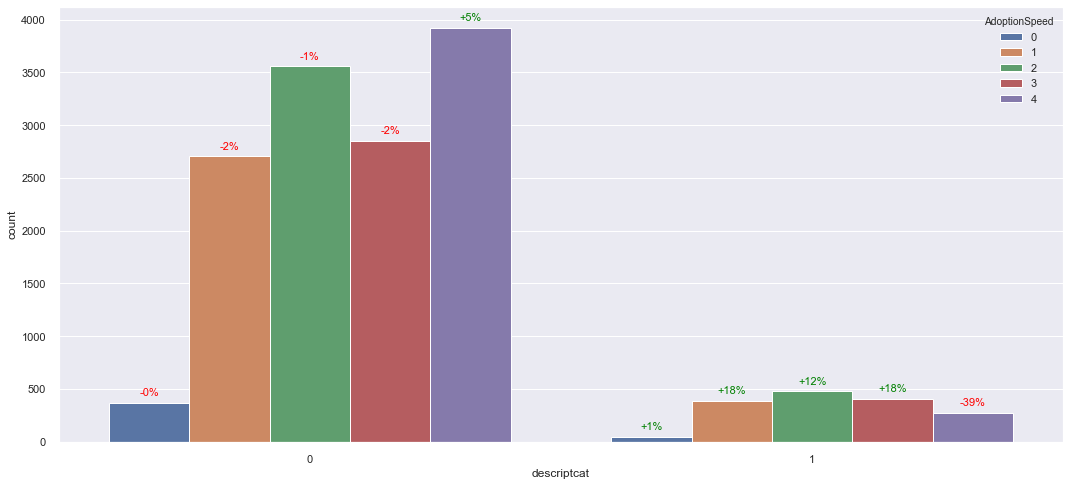

In [67]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='descriptcat', title='by pet description')

The final description feature denominated 'descriptcat', as observed above, is capable of discriminate well adopted and not adopted pets. Although, the big discrepancy between counts of category 0 and 1, might impair some classifiers. 

### 0.2.8. Color

#### 0.2.8.1 Number of colors

We start by dividing pets according to the number of colors they have, creating 3 categories with following encoding:
   
* 0 - unicolor;
* 1 - bicolor;
* 2 - tricolor;

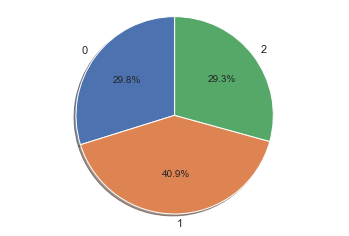

In [68]:
df['colorcat'] = 0
df.loc[df.Color2 != 0, 'colorcat'] = 1
df.loc[df.Color3 != 0, 'colorcat'] = 2
make_pie(df['colorcat'])

<Figure size 1296x576 with 0 Axes>

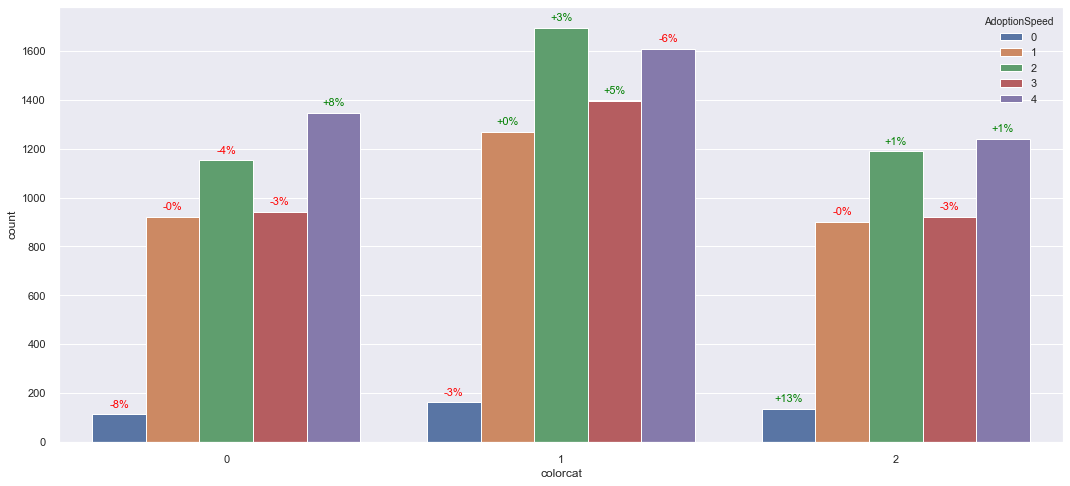

In [69]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='colorcat', title='by pet color')

Well balanced feature, but doesn't discriminate the target very well. Using only this features implies the loss of data regarding what colors the pets actually have.

#### 0.2.8.2 Rule based approach

To solve this problem we decided to engineer a new feature, using a rule based model to detect patterns between adoption and color.

In [70]:
#Create transactions
df['colortrX'] = [[] for x in range(len(df))]
colorlist = ['Color1', 'Color2', 'Color3']
colorlabel = pd.read_csv(os.path.join(path, "color_labels.csv"))

for x in range(len(df)):
    for color in colorlist:
        if df.loc[x, color] != 0:
            df.loc[x, 'colortrX'].append(str(list(colorlabel.loc[colorlabel.ColorID == df.loc[x, color], 'ColorName'])).strip("['']"))
        if df.loc[x, 'Adoption'] == 1:
            df.loc[x, 'colortrX'].append('Adoption')

In [71]:
#Compute binary database
TxE = TransactionEncoder()
te_ary = TxE.fit(df['colortrX']).transform(df['colortrX'])
binary_database = pd.DataFrame(te_ary, columns=TxE.columns_)
binary_database.head()

Adoption  Black  Brown  Cream  Golden   Gray  White  Yellow
0      True   True  False  False   False  False   True   False
1      True   True   True  False   False  False  False   False
2      True  False   True  False   False  False   True   False
3      True   True   True  False   False  False  False   False
4      True   True  False  False   False  False  False   False

In [72]:
from mlxtend.frequent_patterns import apriori
#Compute itemsets
frequent_itemsets = apriori(binary_database, min_support=0.3, use_colnames=True)
frequent_itemsets

support           itemsets
0  0.720069         (Adoption)
1  0.495365            (Black)
2  0.471087            (Brown)
3  0.488628            (White)
4  0.356166  (Black, Adoption)
5  0.333889  (Adoption, Brown)
6  0.357967  (Adoption, White)

In [73]:
from mlxtend.frequent_patterns import association_rules
# Compute association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules

antecedents consequents  antecedent support  consequent support   support  \
0     (Black)  (Adoption)            0.495365            0.720069  0.356166   
1     (Brown)  (Adoption)            0.471087            0.720069  0.333889   
2     (White)  (Adoption)            0.488628            0.720069  0.357967   

   confidence      lift  leverage  conviction  
0    0.718998  0.998512 -0.000531    0.996188  
1    0.708764  0.984300 -0.005326    0.961181  
2    0.732596  1.017397  0.006121    1.046846

To interpret the results we need to understand the lift measure. If lift is one, the feature and target are independent. When the lift metric is not one, the relationship is positive or negative respectively.

In this case we can say that Black and Brown colors have a higher probability of not being adopted, while white is more likely to be adopted.

Based on this results we can now create a new binary feature, with the following encoding:

* 0- Doesn't contain Brown/Black colors
* 1- Contains Brown/Black colors

In [74]:
colorlabel 

ColorID ColorName
0        1     Black
1        2     Brown
2        3    Golden
3        4    Yellow
4        5     Cream
5        6      Gray
6        7     White

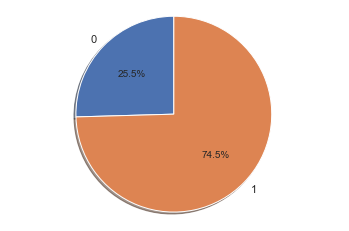

In [75]:
df['colorcat2'] = 0
df.loc[df.Color1 == 1, 'colorcat2'] = 1
df.loc[df.Color1 == 2, 'colorcat2'] = 1
make_pie(df['colorcat2'])

On this pie chart it can be observed that there is some imbalance in this new feature.

<Figure size 1296x576 with 0 Axes>

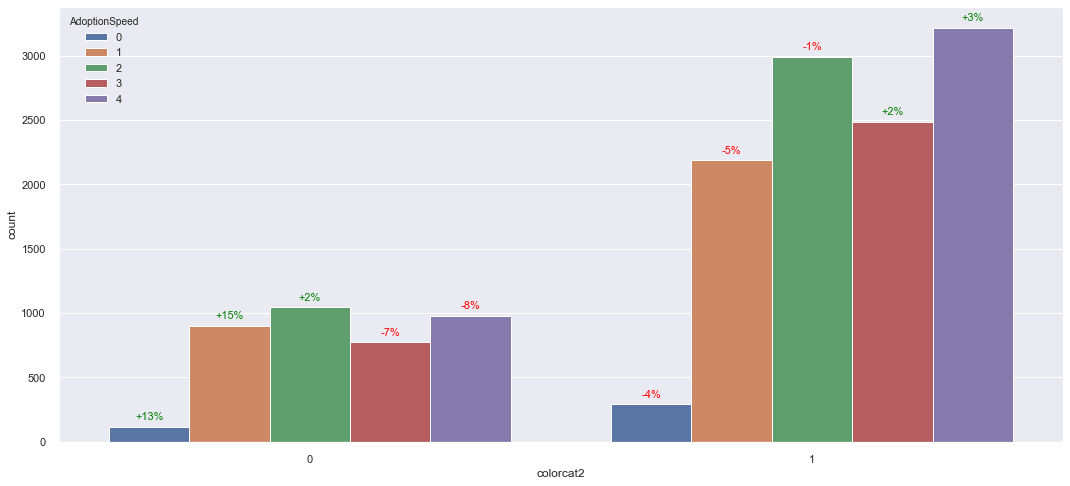

In [76]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='colorcat2', title='by pet color')

As expected we can discriminate very well, between adopted and not adopted pets.

We see that pets with black or brown in their colors are less likely to be adopted as quickly as the other pets.

### 0.2.9. Health

Plot Health features to see how they vary with adoption speed

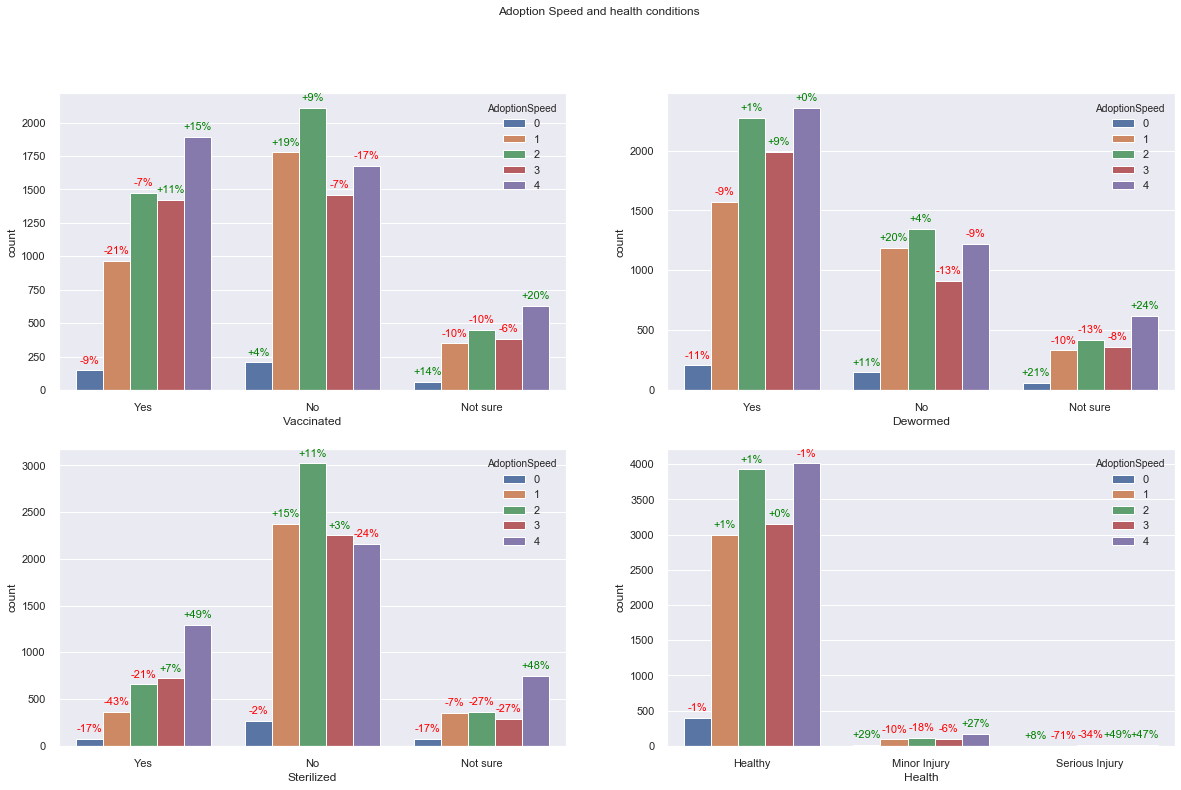

In [77]:
plt.figure(figsize=(20, 12));
plt.subplot(2, 2, 1)
make_count_plot(df=df, x='Vaccinated', title='Vaccinated', fig=False)
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure']);

plt.subplot(2, 2, 2)
make_count_plot(df=df, x='Dewormed', title='Dewormed', fig=False)
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure']);

plt.subplot(2, 2, 3)
make_count_plot(df=df, x='Sterilized', title='Sterilized', fig=False)
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure']);

plt.subplot(2, 2, 4)
make_count_plot(df=df, x='Health', title='Health', fig=False)
plt.xticks([0, 1, 2], ['Healthy', 'Minor Injury', 'Serious Injury']);

plt.suptitle('Adoption Speed and health conditions');

Interestingly, being vaccinated and sterilized, and to a certain degree dewormed seems to be correlated negatively with adoption speed, meaning these pets are less likely to be adopted.

Most pets are healthy and this seems to imply higher rates of adoption.

#### Clustering approach to feature reduction 

We have four heavily correlated features. So we decided to use clustering techniques has a reduction method for these features. The clustering result will be used has a single feature, that contains most of the important information from the other four features.

In [78]:
#Create transactions
df['healthhTxt'] = [[] for x in range(len(df))]
hlist = ['Dewormed', 'Vaccinated', 'Sterilized', 'Health']

for x in range(len(df)):
    for h in hlist:
        if df.loc[x, h] == 1:
            df.loc[x, 'healthhTxt'].append(h)

In [79]:
from mlxtend.preprocessing import TransactionEncoder
#Compute binary database
TxE = TransactionEncoder()
te_ary = TxE.fit(df['healthhTxt']).transform(df['healthhTxt'])
binary_database = pd.DataFrame(te_ary, columns=TxE.columns_)
binary_database

Dewormed  Health  Sterilized  Vaccinated
0         False    True       False       False
1         False    True       False       False
2          True    True       False        True
3          True    True       False        True
4         False    True       False       False
...         ...     ...         ...         ...
14988     False    True       False       False
14989      True    True        True        True
14990      True    True       False       False
14991      True    True        True        True
14992     False    True       False       False

[14993 rows x 4 columns]

In [80]:
from sklearn.cluster import AgglomerativeClustering

hca_ward = AgglomerativeClustering(linkage ="ward", n_clusters=2)
hca_ward = hca_ward.fit(binary_database)

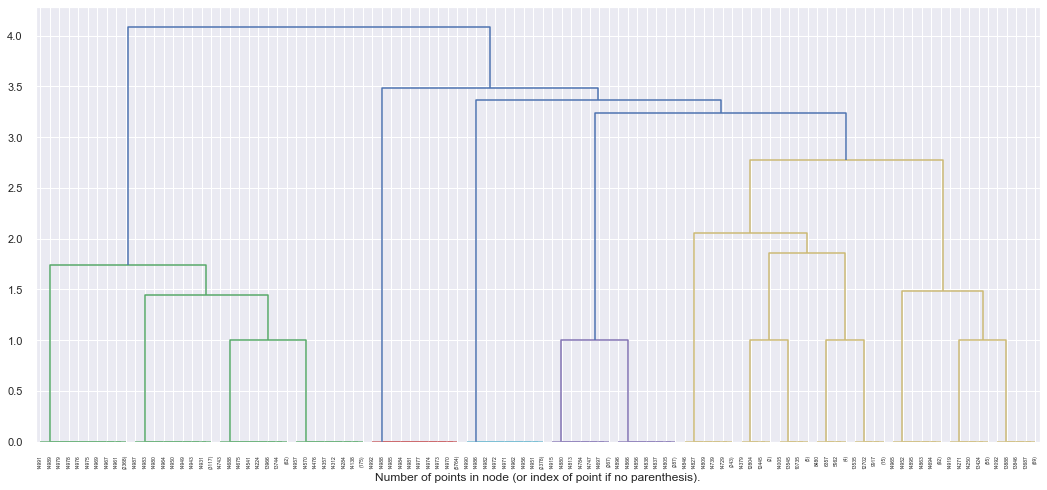

In [81]:
#Plot Dendogram
#plot the top five levels of the dendrogram
plt.figure(figsize=(18, 8));
plot_dendo(hca_ward, binary_database.astype(int).values, truncate_mode='level', p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

This dendogram has two main cluster, which indicates that our clustering algorithm will probably perform better when looking for two clusters in the binary dataset.

In [82]:
cm, metric = model_metrics2(df['Adoption'], hca_ward)
print('Score: ',metric)
print('Confusion Matrix: \n', cm)

Score:  0.5683123145905424
Confusion Matrix: 
       0     1
0  2351  6889
1  1846  3907


The clustering algorithm clearly isn't creating clusters homologous to our target, but it can still hold important information on our target. 

By plotting we can observe if the clusters can discriminate adopted from not adopted.

<Figure size 1296x576 with 0 Axes>

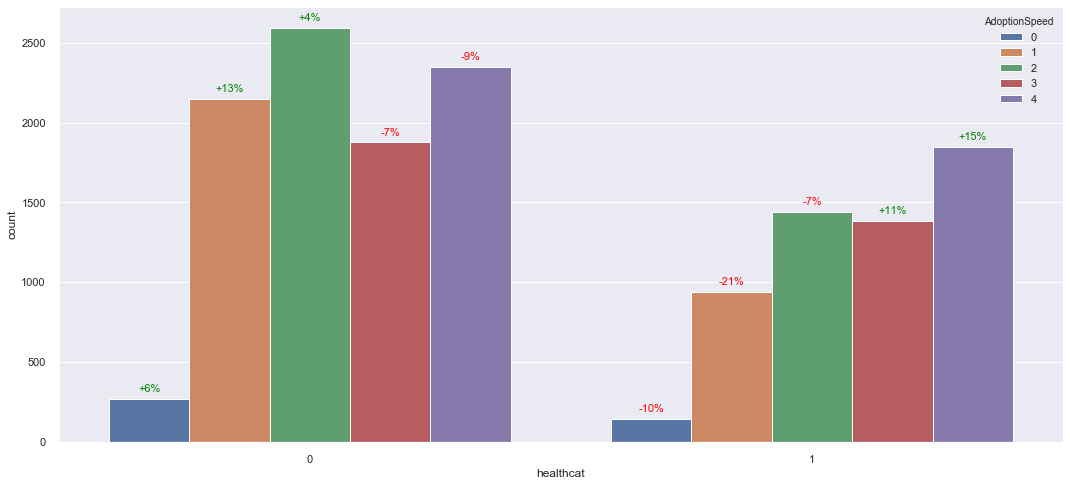

In [83]:
df['healthcat'] = hca_ward.labels_
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x='healthcat', title='healthcat')

We are able to see that our clusters hold information on the target, since if a pet belongs to cluster 1 is less likely to be adopted that a pet on cluster 0.

### 0.2.10. State

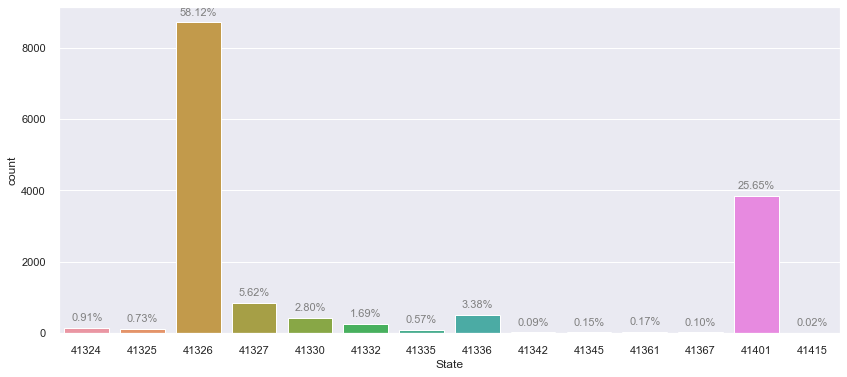

In [84]:
make_bar_chart(df['State'])

One state holds 58.12% of the pets on the dataset, given this information our approach was group all other states to see whether this state was an advantage on adoption.

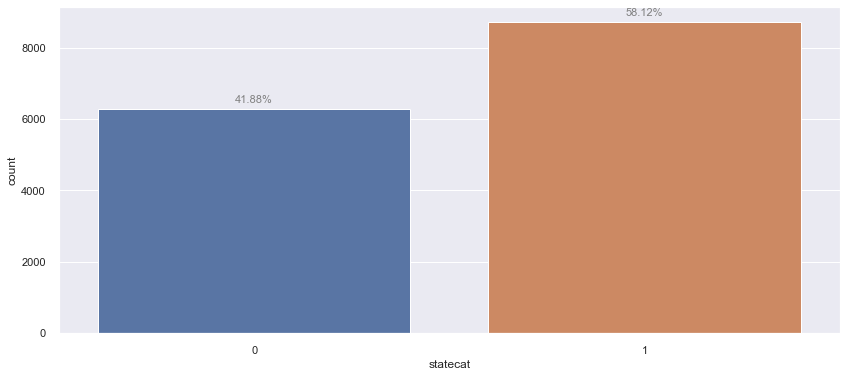

In [85]:
df['statecat'] = 0
df.loc[df.State == 41326, 'statecat'] = 1
make_bar_chart(df['statecat'])

So the feature State is now binned in two categories:
* 0 - Other States
* 1 - Selangor State

<Figure size 936x576 with 0 Axes>

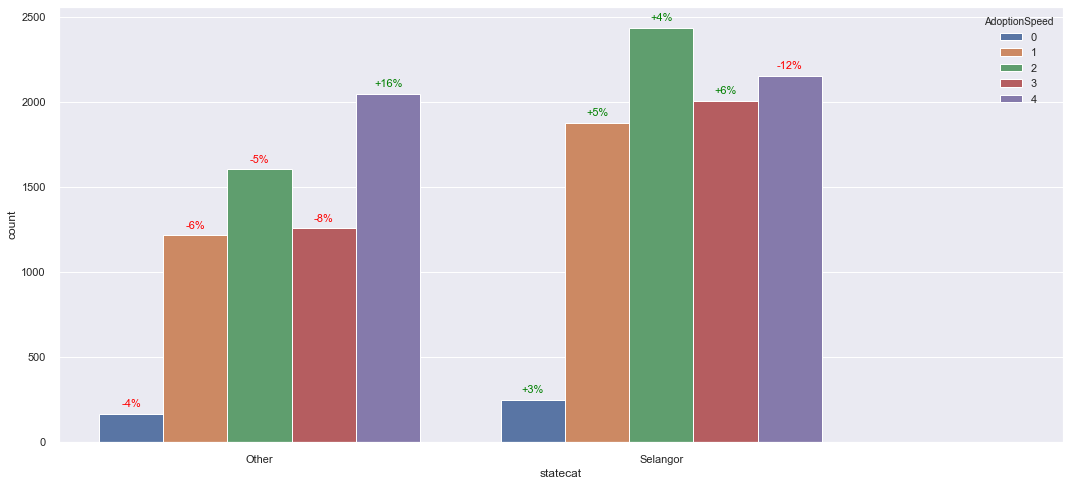

In [86]:
plt.figure(figsize=(13, 8));
make_count_plot(df=df,x='statecat', title='if pets in Selangor')
plt.xticks([0, 1, 2], ['Other', 'Selangor']);

It's observable that pets in Selangor state are more likely to be adopted that in other states

### 0.2.11. Fur Length

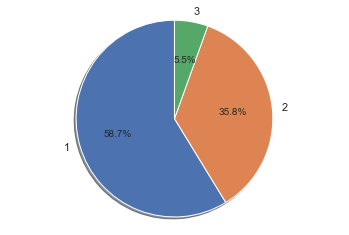

In [87]:
make_pie(df['FurLength'])

<Figure size 1296x576 with 0 Axes>

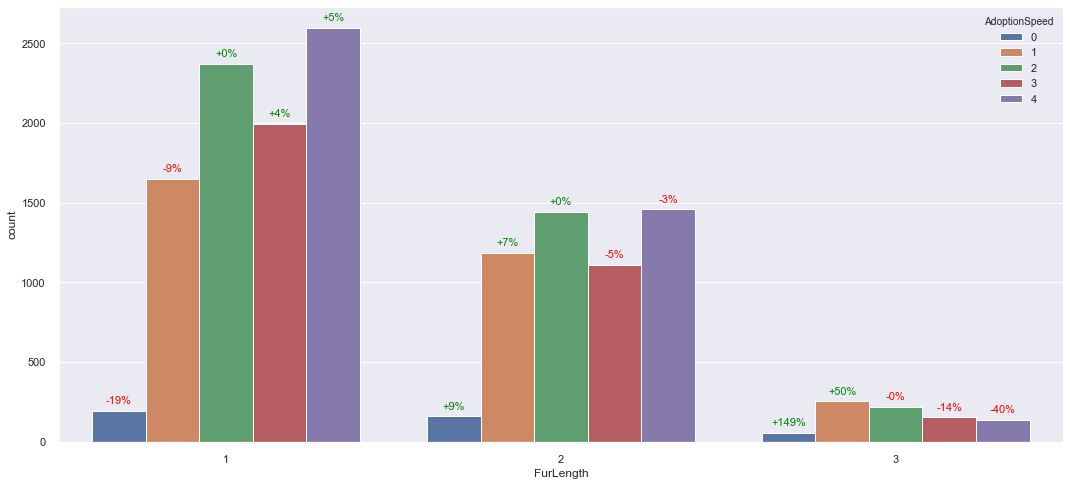

In [88]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x= 'FurLength')

Categories 2 (medium hair) and 3 (long hair) seem to be more adopted when comparing to category 1 (short hair).

Since category 3 it's only present in 5 % of the pets in the dataset, and it's similar in nature with category 2 we will join this two categories.

<Figure size 1296x576 with 0 Axes>

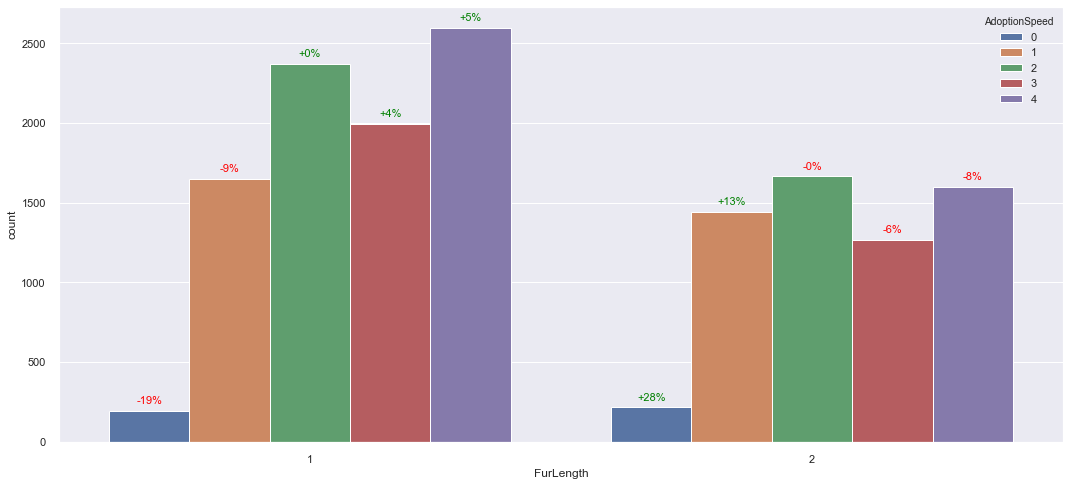

In [89]:
df.loc[df.FurLength == 3, 'FurLength'] = 2
plt.figure(figsize=(18, 8));
make_count_plot(df=df,x= 'FurLength')

Our final feature is better balanced and can better discriminate between adopted and not adopted pets.

We can conclude that pets with shorter hair are more adopted then pets with medium and long hair.

### 0.2.12. Maturaty Size

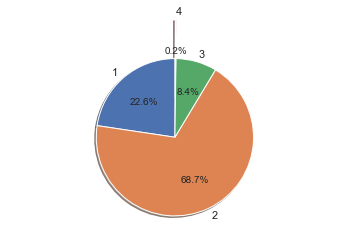

In [90]:
make_pie(df['MaturitySize'])

It can be observed that extra large pets are very rare, for this reason, and do to their similar meaning we decided to group the extra large pets category with the large pets. 

Mostly pets are medium sized though. 

<Figure size 1296x576 with 0 Axes>

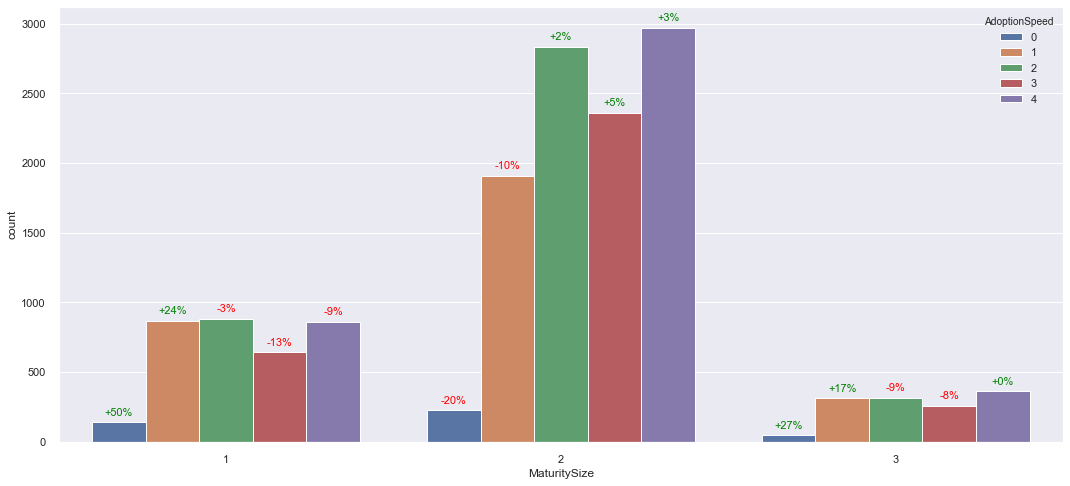

In [91]:
df.loc[df.MaturitySize == 4, 'MaturitySize'] = 3
plt.figure(figsize=(18, 8));
make_count_plot(df=df, x= 'MaturitySize')

We can see that medium pets are less, likely to be adopted that any other category. 

Given the very different distributions of counts, a binary feature medium or not medium will probably better discriminate the target (adoption). To choose which feature will be feed to our classifiers, we will apply an univariate selection approach using the `SelectKBest` algorithm.

<Figure size 1296x576 with 0 Axes>

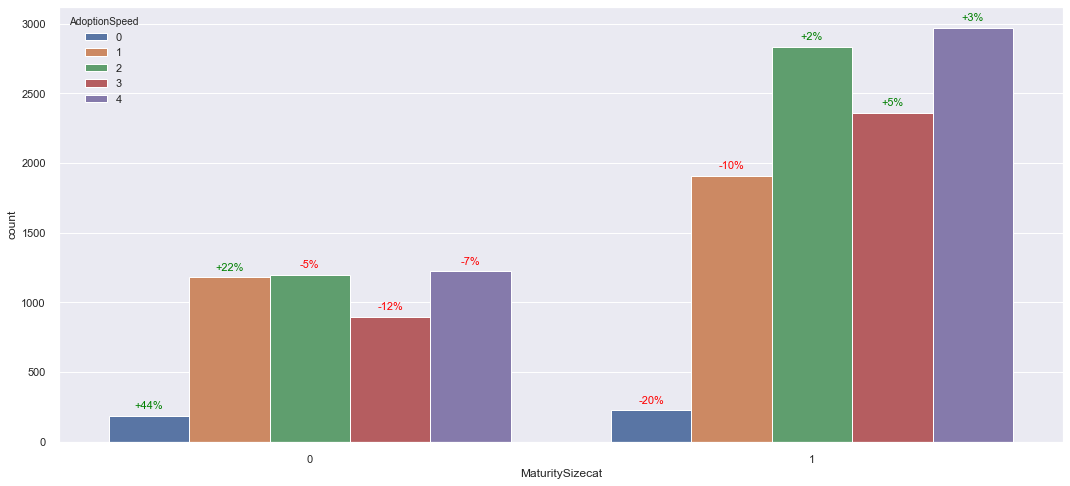

In [92]:
df['MaturitySizecat'] = 0
df.loc[df.MaturitySize == 2, 'MaturitySizecat'] = 1
plt.figure(figsize=(18, 8));
make_count_plot(df=df,x= 'MaturitySizecat')

By graphical comparison only the binary feature seems to be obtaining better results, now the `SelectKBest` algorithm, will be used to ensure this result.

It will be using the chi-squared distribution since we are dealing with two categorical variables. (that are not all binary, or else fisher score could also be an option)

In [93]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Create list of features
a1 = list(df['MaturitySizecat'].values)
a2 = list(df['MaturitySize'].values)
X = [a1, a2]
X = np.array(X)
X = np.transpose(X)
# Create target
y = df['AdoptionSpeed'].values
# feature extractor
test = SelectKBest(score_func=chi2, k=1)
fit = test.fit(X, y)
#See best features
np.set_printoptions(precision=3)
print('Score: \n', fit.scores_)
feature = fit.transform(X)
# summarize selected features
print('Selected Feature: \n', feature)

Score: 
 [43.311  6.451]
Selected Feature: 
 [[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [1]]


The `SelectKBest` algorithm confirms our suspicions by assigning a much higher score the the binary feature.

This feature is not only better balanced, has it explains our target better and  in a simpler manner.

### 0.2.13. AMT

#### 0.2.13.1 Photo AMT

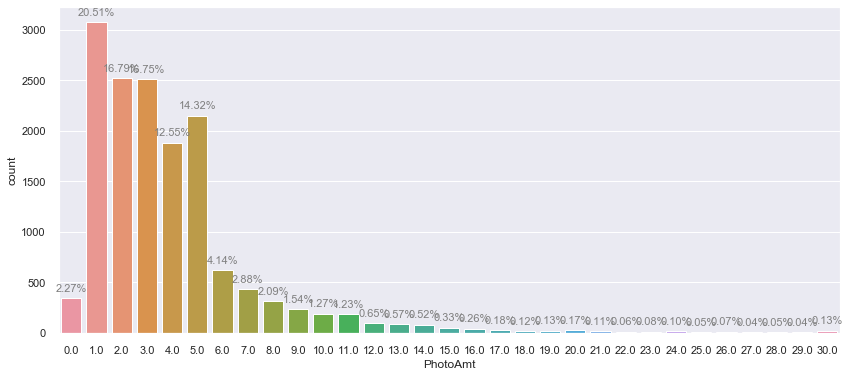

In [94]:
make_bar_chart(df['PhotoAmt'])
plt.title = ('Number of Photos')

Most pets have between one and five photos.

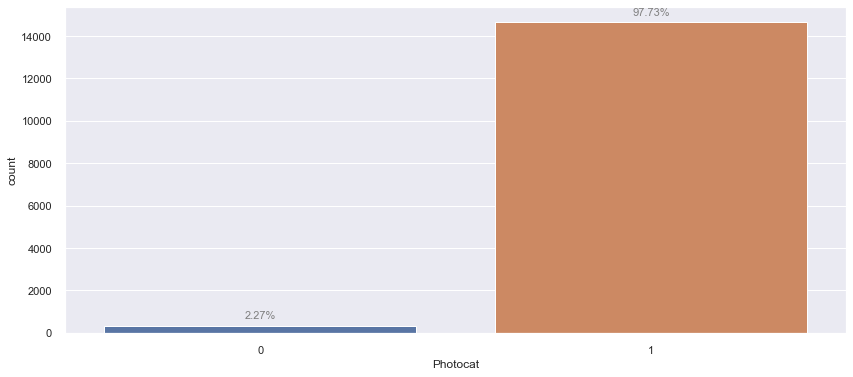

In [95]:
df['Photocat'] = pd.cut(df['PhotoAmt'], [-math.inf, 0,math.inf], include_lowest=True, labels=['0', '1'])
make_bar_chart(df['Photocat'])

Only 2.27% of the pets on our dataset add no photo.

<Figure size 1296x576 with 0 Axes>

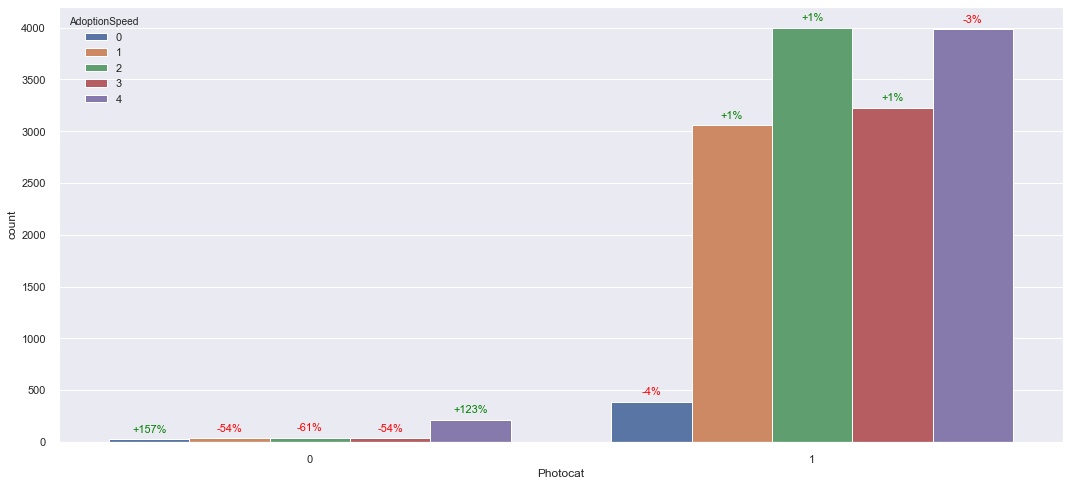

In [96]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df,x='Photocat')

We expected a big difference in adoption rates between pets with no photo, and pets with photos. But has we can observe this variation cannot be verified by the data available. We supposed that the very low count of pets without photos, might affecting our results.

Since all other features are categorical, we will encode this feature through the application of a binning strategy. This technique allows us to reduce our feature while maintaining most of the information.

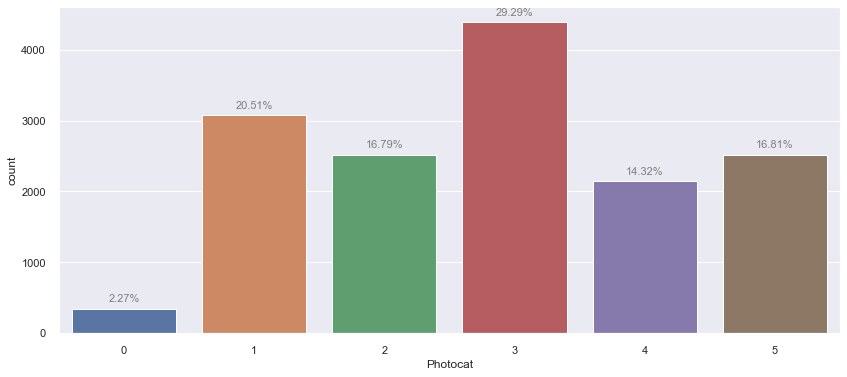

In [97]:
#Create photo categories
#Enconding
#0 = 0, 1-2 = 1, 2-4 = 2, 4-5 = 3, 5-inf = 4
#guarantee similar percentages in all categories to balance photo number
df['Photocat'] = pd.cut(df['PhotoAmt'], [-math.inf, 0, 1, 2, 4, 5, math.inf], include_lowest=True, labels=['0', '1', '2','3','4', '5'])
make_bar_chart(df['Photocat'])

<Figure size 1296x576 with 0 Axes>

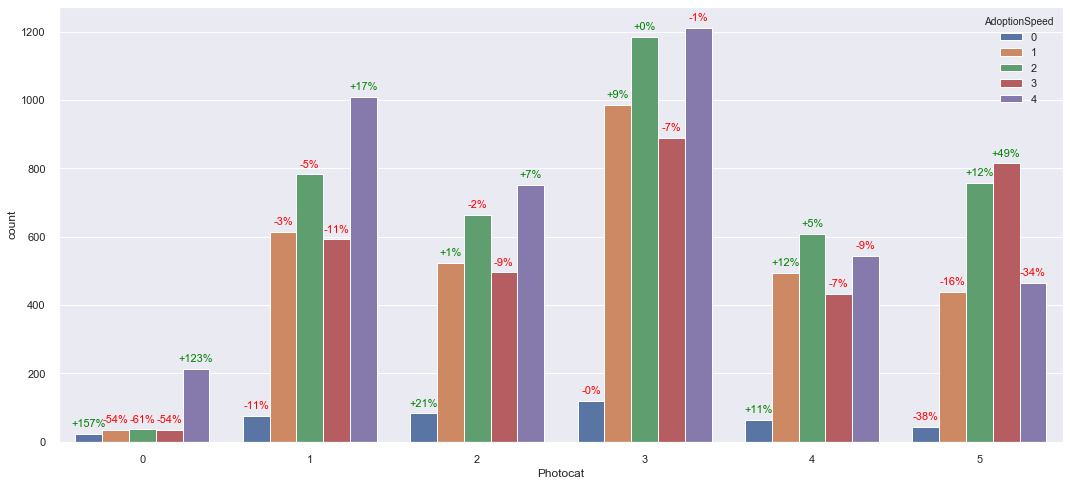

In [98]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df,x='Photocat')

Visually not much information can be obtained, but we hope that our classifiers can make use of this feature's high cardinality to better find hidden patterns in the data.

#### 0.2.13.2 Video AMT

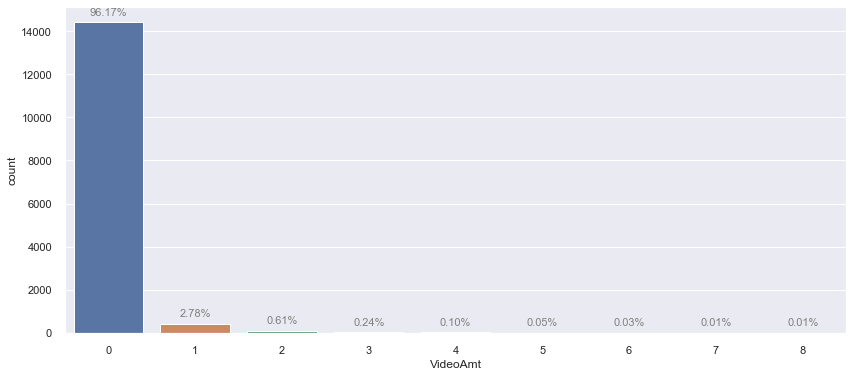

In [99]:
make_bar_chart(df['VideoAmt'])
plt.title = ('Number of Videos')

<Figure size 1296x576 with 0 Axes>

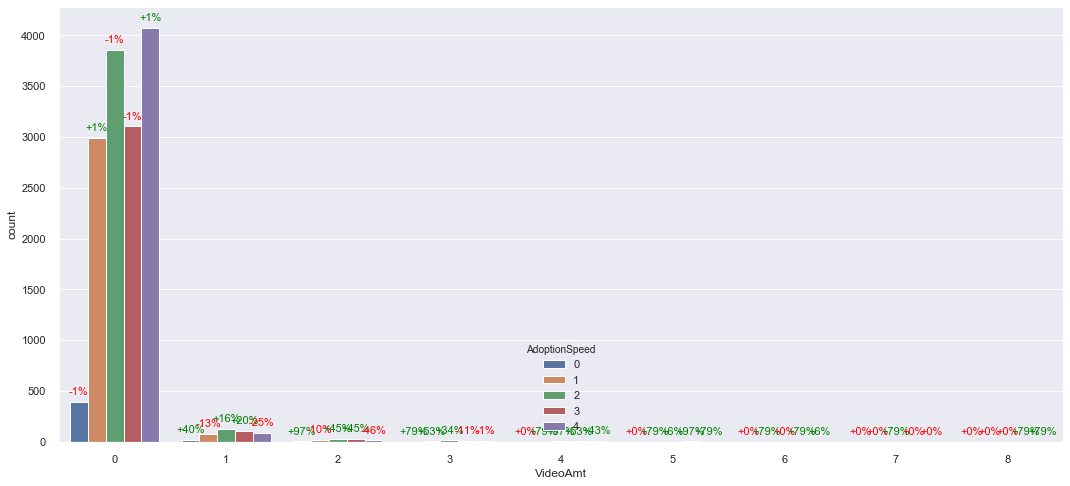

In [100]:
plt.figure(figsize=(18, 8));
make_count_plot(df=df,x='VideoAmt')

The `VideoAmt` feature has to many null values, and it doesn't seen to have any information that would help the algorithm discriminate better, for this reason, we will exclude this feature.

### 0.2.14 *Quantity*

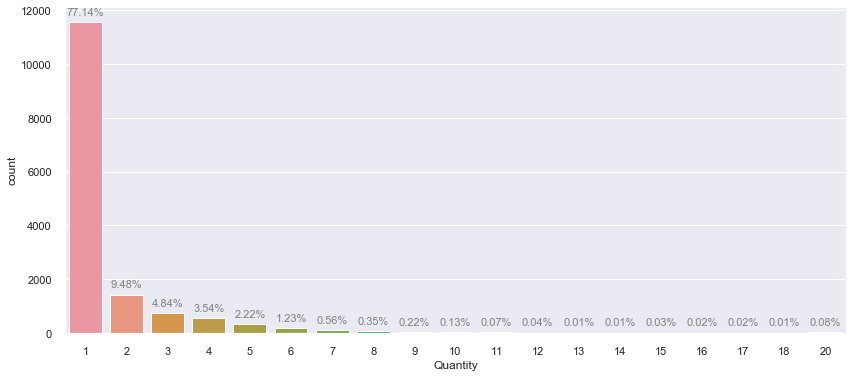

In [101]:
make_bar_chart(df['Quantity'])

Most ads have only one pet, our strategy to solve this feature's imbalance is to encode it into a binary feature. Using the following encoding:

* 0 - Single pet
* 1 - Multiple pets

<Figure size 1296x576 with 0 Axes>

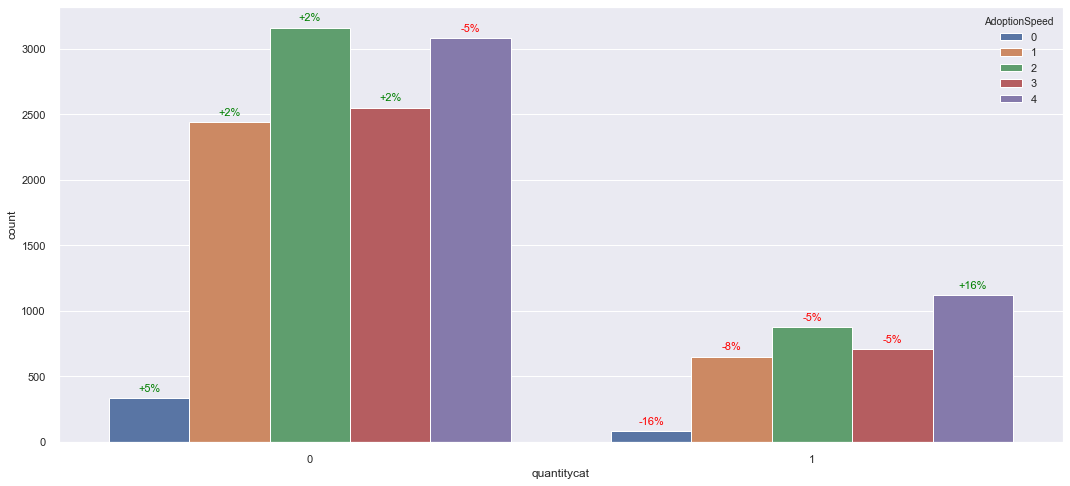

In [102]:
df['quantitycat'] = 1
df.loc[df.Quantity == 1,'quantitycat'] = 0
plt.figure(figsize=(18, 8));
make_count_plot(df,x='quantitycat')

As expected, an ad with a single pet seems to improve adoption chances.

### 0.2.15 Fee

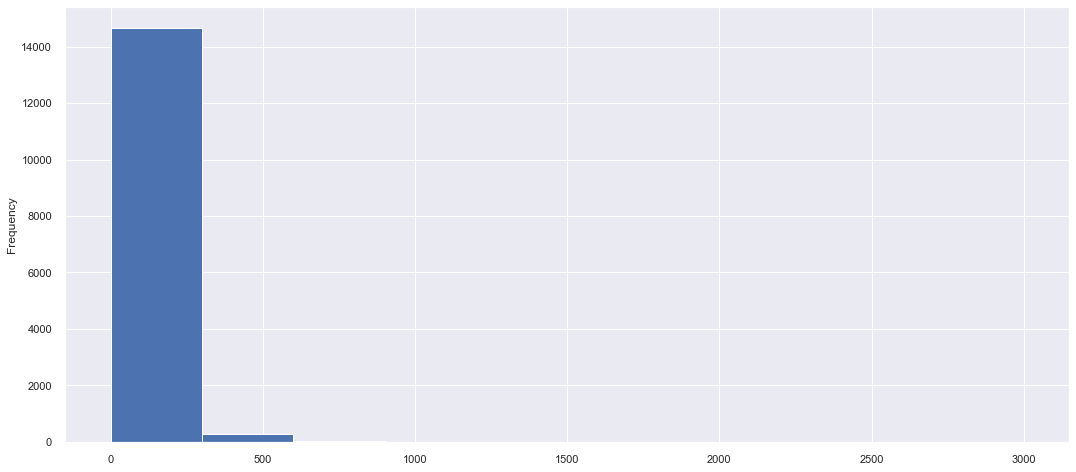

In [103]:
plt.figure(figsize=(18, 8));
df['Fee'].plot(kind='hist', label='train', bins=10)

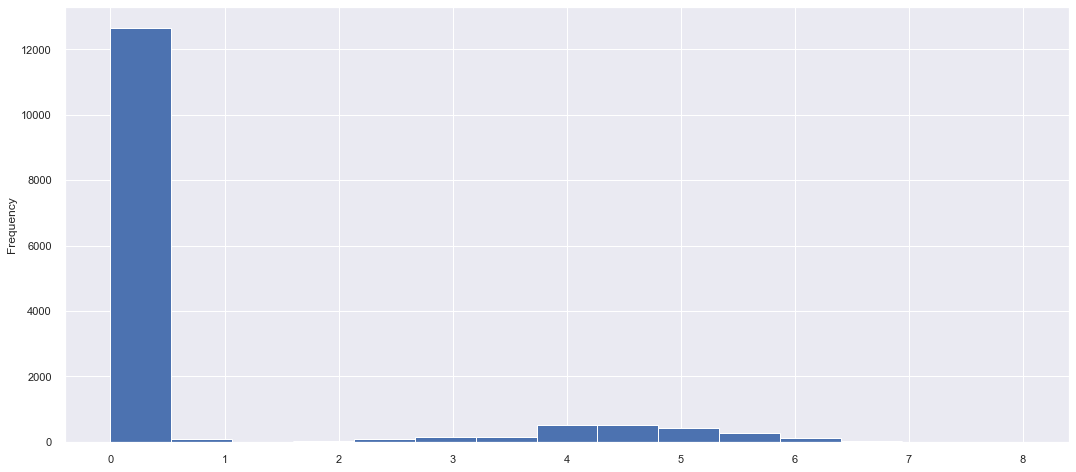

In [104]:
#Log
plt.figure(figsize=(18, 8));
np.log1p(df['Fee']).plot(kind='hist', label='train', bins=15)

Most pets are free, let's create a binary feature with the encoding paid/not paid.

<Figure size 1296x576 with 0 Axes>

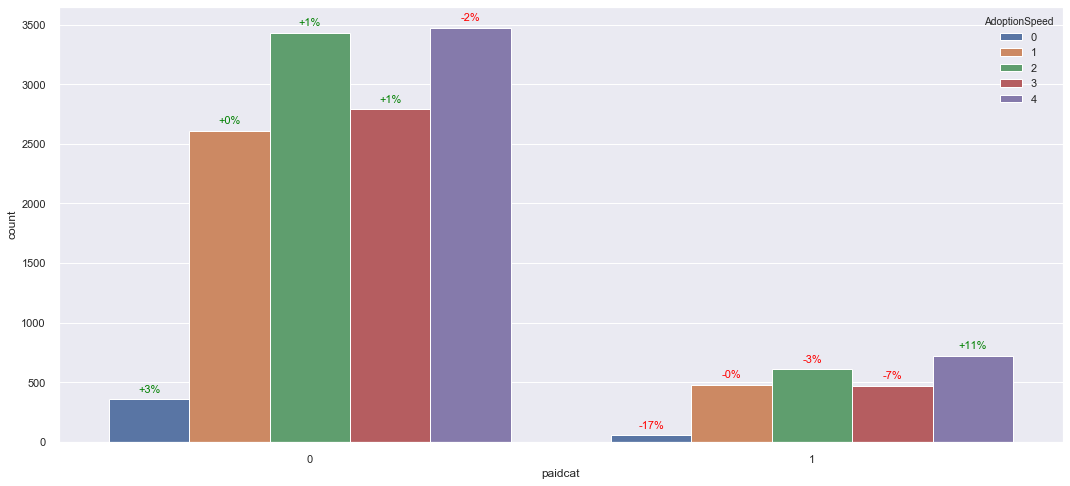

In [105]:
df['paidcat'] = 0
df.loc[df.Fee != 0,'paidcat'] = 1
plt.figure(figsize=(18, 8));
make_count_plot(df, x='paidcat')

We can conclude that paid pets are less adopted them free ones.

### 0.2 Remarks

Throughout the analysis of each feature, we've reached the following conclusions:

* Adoption Speed: the time between an adoption ad being posted and the moment of adoption of that same pet is usually slow;
* Type: cats are adopted faster than dogs. However, in total, there are less cats than dogs;
* Gender: male pets are adopted faster than female or mixed ones;
* Age: a pet's adoption speed is inversely proportional to his/her age. Mixed genders are normally only found in young pets.
* Breed: Pets that contain a pure bread seem to be adopted faster;
* Name: pets without a name are adopted faster, most likely because of the correlation between having no name and having a younger age;
* Color: pets that are black or brown colored are less likely to be adopted as quickly as the other pets;
* Health: being vaccinated and sterilized, and to a certain degree being dewormed seems to impair the pets adoption speed. Even so, most pets are healthy which improves their adoption rates.
* State: pets in Selangor state are more likely to be adopted comparatively to other states;
* Fur Length: pets with longer hair (medium and long) are adopted faster than pets with short hair;
* Maturity Size: when maturity size is reached, smaller pets are adopted more quickly than larger ones;
* AMT: Their isn't a difference in adoption rate, when comparing pets with photos and pets without photos; because it doesn't represent great deal of information regarding adoption the `VideoAMT` feature will be excluded;
* Quantity: ads that have more than one pet effect negatively their adoption rate;
* Fee: pets that have an adoption fee are slightly less adopted than free ones;

**We observed them when considering types of pets separately many of the features available are heavily imbalanced**, this might impair type specific predictors. One possible solution would be to prefer other features for this type of classification, but this option will probably lead to an even bigger impairment due to information loss.

## 0.3 Target Imbalance Correction 

As we seen during the previous section, our multi class target (`Adoption Speed`) is imbalanced, with  only 2,5 % of pets from class 0. We've also seen that our binary target is imbalanced having 27% of adoption. 

Our dataset is only balanced when considering the types of pets individually (dogs and cats). 

To correct this imbalance we will use a mixture of under and over sampling techniques, chosen with the properties of our dataset in mind following this bibliography:

* At, E., Aljourf, M., & Shoukri, M. (2017). Classification of Imbalance Data using Tomek Link ( T-Link ) Combined with Random Under-sampling ( RUS ) as a Data Reduction Method Technology & Optimization. Global Journal of Technology & Optimization, 1–11. https://doi.org/10.4172/2229-8711.S1

* Hall, L. O., Kegelmeyer, W. P., Chawla, N. V., & Bowyer, K. W. (2002). SMOTE: Synthetic Minority Over-sampling Technique Nitesh. Journal of Artificial Intelligence Research, (Sept. 28), 321–357. https://doi.org/10.1613/jair.953
* Under-sampling — imbalanced-learn 0.5.0 documentation. (n.d.). Retrieved December 6, 2019, from https://imbalanced-learn.readthedocs.io/en/stable/under_sampling.html
* Resampling strategies for imbalanced datasets | Kaggle. (n.d.). Retrieved December 6, 2019, from https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets#t7

Let's start be correcting the imbalance for our multi-class target.

In [106]:
# Get index of all not features
l = ['Type', 'Gender', 'FurLength']
del_cols = [i for i, col in enumerate(df.columns) if 'cat' not in col and col not in l]
# Get all features
cols = [[i, col] for i, col in enumerate(df.columns) if 'cat' in col or col in l]
# Create list of features
X = df.values
length = X.shape[1]
X = np.delete(X,del_cols,axis=1)
#Create target
y = df['AdoptionSpeed']
# Check correct number of cols were deleted
if length - len(del_cols) == X.shape[1]:
    print('Check')

Check


Mixture of under sampling and over sampling:
1. `SMOTE` Funcion 
2. `Tommek Links` Function

The `SMOTE` function will generate new data points in the minority category, based on points that already existed in the dataset. Subsequently through the `Tommek Links` technique data points from other classes that are very close to the minority class will be deleted, allowing the classifiers to discriminate this class better and eliminate redundancies.

Since we are working with categorical data, special attention must be given to using distance based techniques. But since our features are only binary or have a distance relation that it's not a problem. Unfortunately our original features do not share this properties and so cannot be balanced using this techniques, which might impair future comparisons that we wish to do.

In [107]:
#Aplly under and over sampling
smt = SMOTETomek()
X_smt, y_smt = smt.fit_sample(X, y)

In [108]:
#Construct feature dataframe and target array
imb_y = y
imb_x = pd.DataFrame(data=X, columns=np.transpose(cols)[1])
Dx = pd.DataFrame(data=X_smt, columns=np.transpose(cols)[1])
y = y_smt

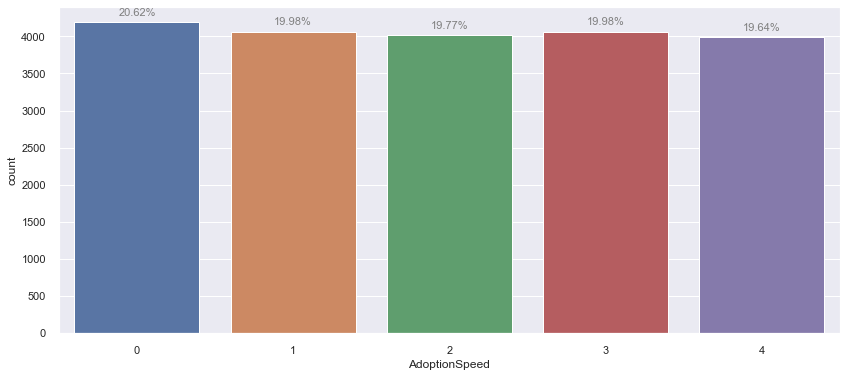

In [109]:
#Plot new target balance
make_bar_chart(y)

We can observe that the imbalance in our dataset was corrected, but since we used distance based techniques they generated `float` values. Next we will change those values to integers again.

In [110]:
#First round all values
Dx = Dx.round(0)
#Second change type
Dx = Dx.astype(int)
Dx.head()

Type  Gender  FurLength  agecat  breedcat  namecat  descriptcat  colorcat  \
0     2       1          2       0         0        0            0         1   
1     1       1          2       0         0        0            0         1   
2     1       1          1       0         0        1            0         0   
3     2       2          1       2         1        0            0         1   
4     2       1          2       3         0        0            1         0   

   colorcat2  healthcat  statecat  MaturitySizecat  Photocat  quantitycat  \
0          1          0         0                1         2            0   
1          1          1         1                1         5            0   
2          1          0         1                1         3            0   
3          0          0         1                1         2            0   
4          1          0         1                1         3            0   

   paidcat  
0        0  
1        0  
2        0  
3        0  
4        1

We will now apply the same techniques to our binary target.

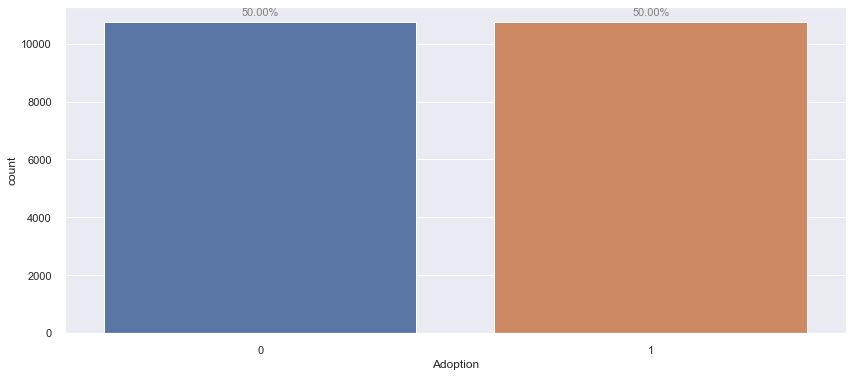

In [111]:
#Get dataset
Bx = X
by = df['Adoption']
#Aplly under and over sampling
smt = SMOTETomek()
Bx, by = smt.fit_sample(Bx, by)
#Construct feature dataframe and target array
Bx = pd.DataFrame(data=Bx, columns=np.transpose(cols)[1])
by = by
#Plot new target balance
make_bar_chart(by)

In [112]:
#First round all values
Bx = Bx.round(0)
#Second change type
Bx = Bx.astype(int)
Bx.head()

Type  Gender  FurLength  agecat  breedcat  namecat  descriptcat  colorcat  \
0     2       1          1       2         0        0            0         1   
1     2       1          2       0         0        0            0         1   
2     1       1          2       0         0        0            0         1   
3     1       2          1       2         0        1            0         1   
4     1       1          1       0         0        1            0         0   

   colorcat2  healthcat  statecat  MaturitySizecat  Photocat  quantitycat  \
0          1          0         1                0         1            0   
1          1          0         0                1         2            0   
2          1          1         1                1         5            0   
3          1          1         0                1         5            0   
4          1          0         1                1         3            0   

   paidcat  
0        1  
1        0  
2        0  
3        1  
4        0

Now both our targets are balanced.

## 0.4 General Feature Selection


Feature selection is an important part of the construction of any classifier, since a model should always has simple has it can be. Without this process classifiers can be impaired by noise or unnecessary features, so it must be done individually for each classifier. But an initial analysis can help to better understand or feature and check for general rules saving precious computing time. Also with some classifiers specific feature selection is harder, and uses to much computing time, when having in consideration the objectives of this project.

In this part we pretend to analyze the individual information contained in each feature, feature importance, and collinearity between features.

### 0.4.1 Univariate Analysis

For the univariate analysis we use the `SelectKBest` algorithm again. This algorithm uses a `Chi-Square` distribution to score feature according to their importance. Like most general feature selection methods is heavily impaired by high cardinality, so the results should always be cautiously read.

Univariate Analysis - an overview | ScienceDirect Topics. Retrieved January 4, 2020, from https://www.sciencedirect.com/topics/economics-econometrics-and-finance/univariate-analysis

In [113]:
# feature extractor
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(Dx, y)
#Create dict with colums and score
scores = {}
for i in range(len(cols)):
    scores.update({cols[i][1] : round(fit.scores_[i],2)} )
#Sort and print
print('Scores:')
scores2 = sorted(scores, key=scores.get, reverse=True)
for line in scores2:
        print (line,': ',scores[line])
#feature = fit.transform(X)
# summarize selected features
#print('Selected Feature: \n', feature)

Scores:
agecat :  797.24
Photocat :  330.98
breedcat :  246.26
healthcat :  164.02
MaturitySizecat :  147.23
descriptcat :  106.59
Type :  69.21
quantitycat :  65.99
statecat :  54.49
FurLength :  43.33
paidcat :  41.15
Gender :  21.42
colorcat :  19.64
namecat :  18.74
colorcat2 :  15.46


Above we have an ordered list of scores for each feature's discriminative power of the target variable `AdoptionSpeed`.

This filter method is not very accurate, since it's univariate which means that it doesn't take in to account possible multi-variable patterns and dependencies, and is severely impaired by high cardinality.

Even so we can observe that the number of photos, age, and breed of the pet may determinate adoption, which makes sense.

Let's now compare this scores against the scores of the original features.

In [114]:
# Create list of original features
X2 = df.values
length = X2.shape[1]
icols = [row[0] for row in cols]
X2 = np.delete(X2,icols,axis=1)
#Create original target
y2 = df['AdoptionSpeed']
#check correct number of cols were deleted
if len(del_cols) == X2.shape[1]:
    print('Check')

Check


In [115]:
#Encode all non numeric variables
for i in range(X2.shape[1]):
    if type(X2[:, i][0]) is str:
        X2[:, i] = np.array([str(line) for line in X2[:, i]])
        X2[:, i] = int_encode_feature(X2[:, i])
# Delete list variables
#Error handling
while X2.shape[1] != 22:
    try:
        for i in range(X2.shape[1]):
            if type(X2[:, i][0]) is list:
                X2 = np.delete(X2,i,axis=1)
    except:
        pass

In [116]:
# feature extractor
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X2, y2)
#Create dict with colums and score
original_scores = {}
del_cols2 = [col for col in df.columns if 'cat' not in col and col not in l]
for i in range(len(cols)):
    original_scores.update({del_cols2[i] : round(fit.scores_[i],2)} )
#Sort and print
print('Scores:')
original_scores2 = sorted(original_scores, key=original_scores.get, reverse=True)
for line in original_scores2:
        print (line,': ',original_scores[line])
#feature = fit.transform(X)
# summarize selected features
#print('Selected Feature: \n', feature)

Scores:
Name :  19203.98
Breed2 :  6714.06
Age :  6338.2
Breed1 :  2991.32
Fee :  267.81
Quantity :  99.74
Color2 :  59.12
Color1 :  47.43
Color3 :  25.18
Sterilized :  20.18
Vaccinated :  17.08
Dewormed :  15.07
MaturitySize :  6.45
State :  1.06
Health :  0.85


We are able to see that the features with best scores are non categorical, and due to their high cardinality are miss scored by the `chi2` scoring function.

Due to the fact that we are comparing mostly binary features with features that have a very high cardinality this method cannot be used to accurately test if we made an improvement on the original features.

### 0.4.2 Importance Analysis (Random Trees)

A given feature's importance is calculate by how much the shuffling of values in that feature affects the models ability to make correct predictions.

This gives a pretty good idea of how this feature will affect the correct identification of our target, if a feature is unnecessary them it should be excluded.

We decided to use a `Random Forest` classifier due to it's higher resistance to cardinality.

In [117]:
X_train,X_test,y_train,y_test = train_test_split(Dx,y,test_size=0.3)
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
sel = SelectFromModel(clf)
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

0.5511475409836065
Index(['Gender', 'agecat', 'colorcat', 'Photocat'], dtype='object')


Above, we are able to observe: initial features selected by the model, and model accuracy which is low.

In [118]:
result = PermutationImportance(clf, random_state=42).fit(X_train, y_train)
eli5.show_weights(result, feature_names = X_train.columns.tolist())

This result more or less resembles what we obtained with the filter method.
This method his also impaired, since any tree model classifier has a build-in preference for features with higher cardinality.

Once again we observe the relevance of the number of photos and also age, we already expected a pattern to emerge from this features since when choosing a pet online, photos available and pet age will always be a big factor.

### 0.4.3 Multicollinearity Analysis

Multicollinearity analysis checks for correlations between features. If features are correlated that will impair the model, and lead to decision bias. For this analysis we apply a clustering strategie based on spearmanr's correlation metric.

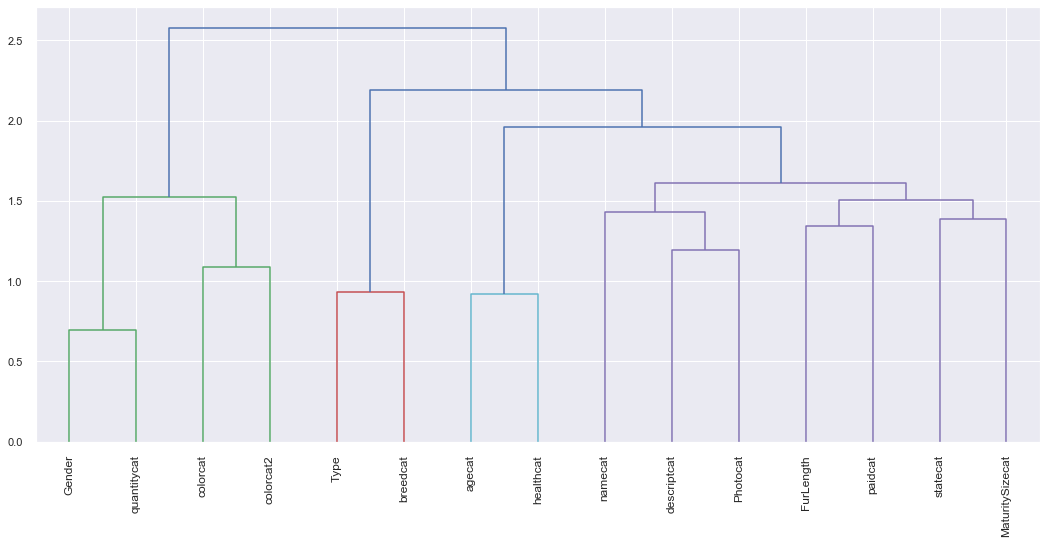

In [119]:
corr = spearmanr(Dx).correlation
corr_linkage = hierarchy.ward(corr)
plt.figure(figsize=(18, 8));
dendro = hierarchy.dendrogram(corr_linkage, labels=Dx.columns,
                              leaf_rotation=90)
dendro_idx = np.arange(0, len(dendro['ivl']))
plt.show()

From the chart above we can access that our model should use at least four features, each from a different cluster. Since features on the some cluster are more dependent on each other, and different clusters supposedly hold unique information.

The clusters also helps understand our features and how they relate, must cluster have features, that if grouped by a human using organizationional logic, would be grouped together. For example the blue cluster has only health information since age greatly influences health. The red cluster is also a good example, since breeds are obviously correlated with the pet type. 

### 0.4. Remarks

We can probably assume that a good model will use at least 4 features, and that features like agecat, photocat, colorcat and breedcat will have some importance in any model's ability to predict our target.

We also observe that none of our general feature selection methods are very good at dealing with multicollinear features, so it's important to guarantee that our final model uses at least one feature from every cluster.

Good comparisons between the original and the new features were not possible do to the severe limitations of this general selection methods.

We think that model specific selection methods like RFE and embeded methods in addition to the information obtained at this stage, might improve the quality of our classifiers. 

In the following tasks we will use an `RFE` function and critical analysis based on results that we have obtained in this analysis.

In cases where the models don't generate feature weights, and so `RFE` cannot be applied we will use a feature selection function, that removes, colinear features, and features with low importance through vif scores and feature importance metrics.

## 0.5 Cross-Validation

> In truth most of the generalized methods we are applying should be applied individually for each target, and maybe even to every classifier. But since time constrains don't permit this sort of analysis, in this project we will use `StratifiedKFold`, since it guarantees that the data in each fold is well distributed, with normally 10 K-Folds (that might be exceptions), which is the default number of folds for large data-sets.

> The K-folds selection process could be improved, but yet again time constrains don't permit us to get into this.

# Ending EDA Notebook

Results will be exported to CSV files

In [58]:
#Create balanced dataset csv
Dx['Target'] = y
Dx.to_csv(os.path.join(path,'Balanced_Dataset.csv'))
#Create binary target dataset csv
Bx['Target'] = by
Bx.to_csv(os.path.join(path,'Binary_Dataset.csv'))
#Create imbalanced binary target dataset csv
Bix = pd.DataFrame(data=X, columns=np.transpose(cols)[1])
Bix['Target'] = df['Adoption']
Bix.to_csv(os.path.join(path,'Binary_Imbalanced_Dataset.csv'))
#Create imbalanced multy-class target dataset csv
imb_x['Target'] = imb_y
imb_x.to_csv(os.path.join(path,'Imbalanced_Dataset.csv'))